<a href="https://colab.research.google.com/github/Bandavinay/Data-structures-algorithms-project-/blob/main/DSA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import classification_report,accuracy_score,fbeta_score
from sklearn import metrics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
df= pd.read_csv('/content/credtcard3.csv')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB
None
   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.0

In [ ]:
df.isnull().sum()


,0
CustomerID,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0


In [ ]:
df.duplicated().sum()


0

In [ ]:
df = df.drop_duplicates()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
# df = pd.read_csv('your_dataset.csv')

# Features to scale
features = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14']

# Standardization (Z-score Scaling)
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df[features]), columns=features)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(df[features]), columns=features)

# Add scaled features back to the dataset (optional)
df_standardized['Class'] = df['Class']  # Keeping the target variable
df_min_max_scaled['Class'] = df['Class']

# Save the scaled data (optional)
# df_standardized.to_csv('standardized_data.csv', index=False)
# df_min_max_scaled.to_csv('min_max_scaled_data.csv', index=False)

# Display scaled datasets
print("Standardized Data (first 5 rows):")
print(df_standardized.head())

print("\nMin-Max Scaled Data (first 5 rows):")
print(df_min_max_scaled.head())


Standardized Data (first 5 rows):
         A1        A2        A3        A4        A5        A6        A7  \
0  0.688737 -0.801052  1.347111  0.542950 -0.916282 -0.347965 -0.190906   
1 -1.451933 -0.751240  0.450548  0.542950  0.170499 -0.347965 -0.615536   
2 -1.451933 -0.167856 -0.604823 -1.783978 -0.916282 -0.347965 -0.291083   
3 -1.451933 -0.835667  1.355152 -1.783978 -0.644587 -0.850257 -0.664877   
4  0.688737 -0.962306  0.685745  0.542950 -0.372892 -0.347965 -0.078768   

         A8        A9       A10       A11       A12       A13       A14  Class  
0 -1.047504 -0.864196 -0.493887  1.087908  0.237828 -0.488358  0.037380      0  
1 -1.047504 -0.864196 -0.493887 -0.919195  0.237828 -0.139591 -0.195413      0  
2 -1.047504 -0.864196 -0.493887  1.087908  0.237828  0.557943 -0.195413      0  
3  0.954650  1.157144  1.769760  1.087908  0.237828 -1.069637 -0.195413      1  
4  0.954650  1.157144  2.387119 -0.919195  0.237828 -0.720870 -0.165066      1  

Min-Max Scaled Data (first 5

In [ ]:
StandardScaler().fit_transform(df)


array([[ 1.19915887,  0.68873723, -0.80105183, ..., -0.48835847,
         0.03738039, -0.89530251],
       [ 0.68683384, -1.45193254, -0.75124044, ..., -0.13959116,
        -0.19541334, -0.89530251],
       [-0.38649046, -1.45193254, -0.16785619, ...,  0.55794344,
        -0.19541334, -0.89530251],
       ...,
       [-0.21021079, -1.45193254, -1.07543661, ..., -0.48835847,
        -0.19541334,  1.11694091],
       [ 1.20388914, -1.45193254, -0.35021653, ..., -0.3721027 ,
        -0.19330052,  1.11694091],
       [-1.37231869,  0.68873723,  0.79628971, ...,  2.18552419,
        -0.19541334,  1.11694091]])

In [ ]:
MinMaxScaler().fit_transform(df)


array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-02, 1.21200000e-02, 0.00000000e+00],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        8.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        1.40000000e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-02, 0.00000000e+00, 1.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        6.00000000e-02, 1.10000000e-04, 1.00000000e+00],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        2.80000000e-01, 0.00000000e+00, 1.00000000e+00]])

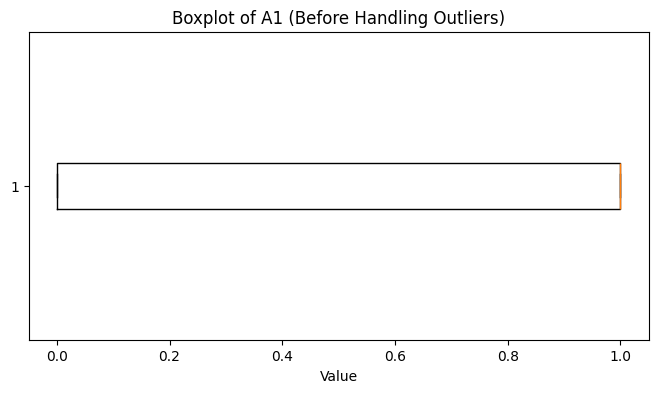

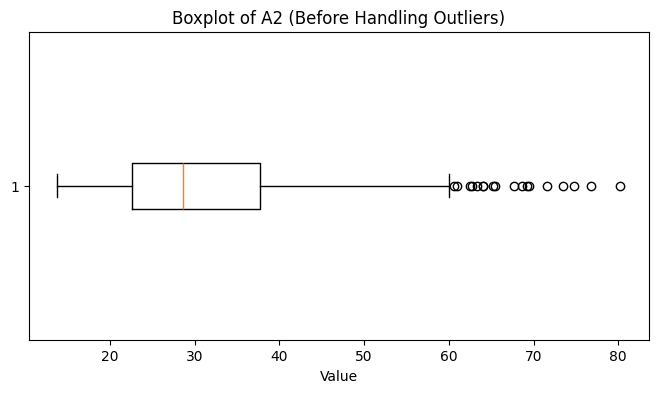

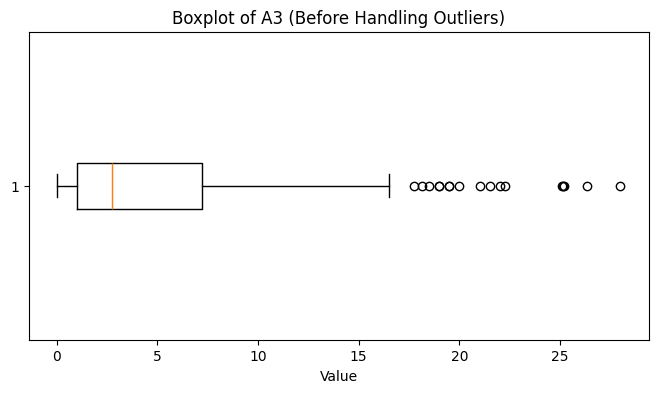

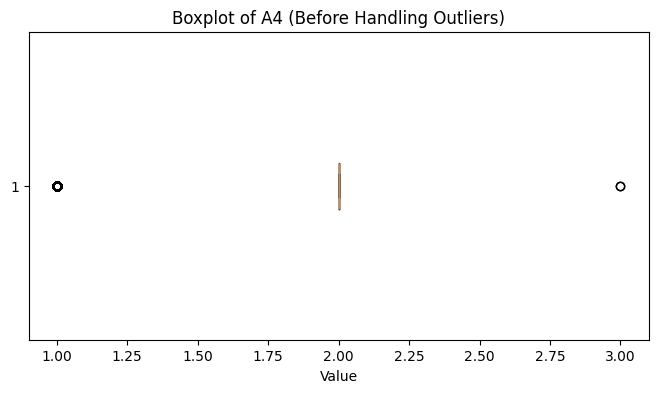

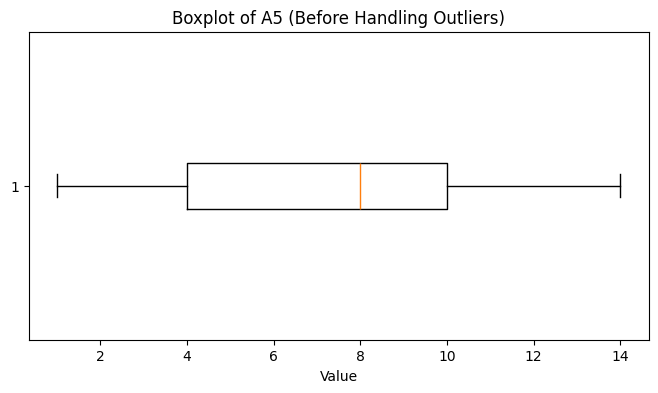

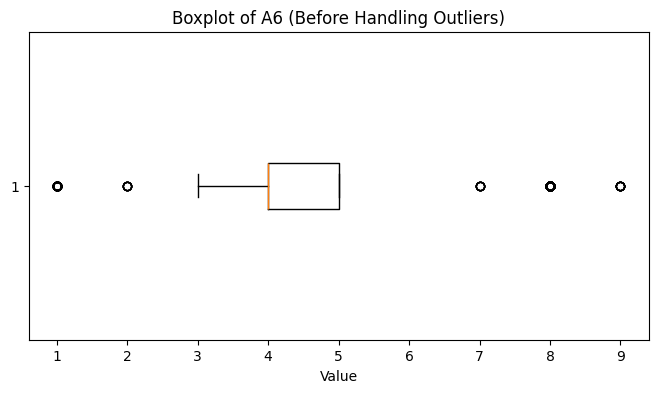

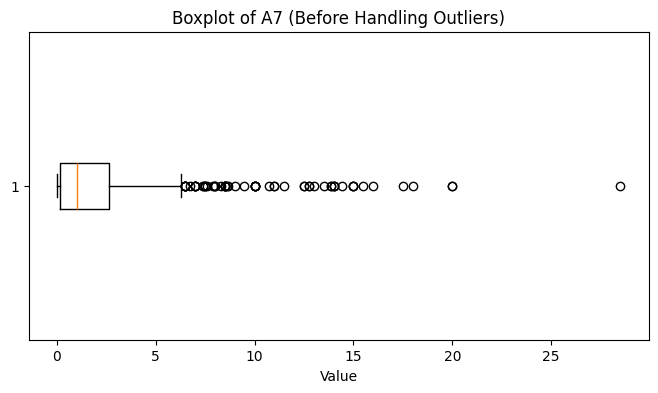

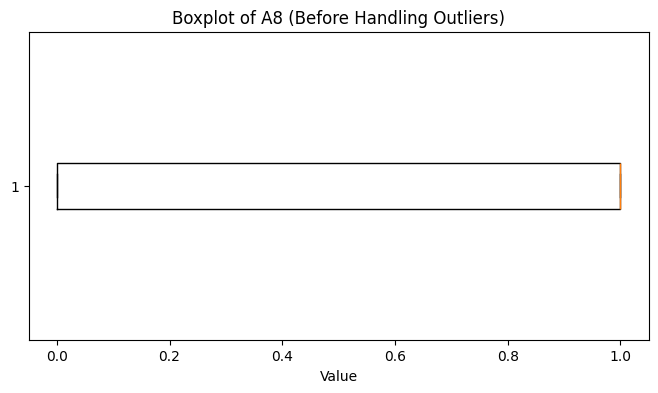

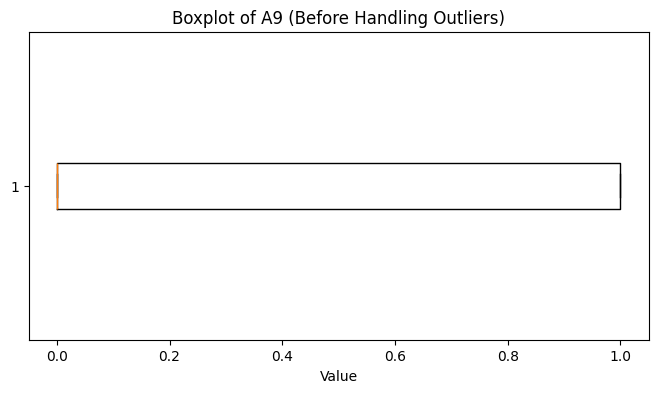

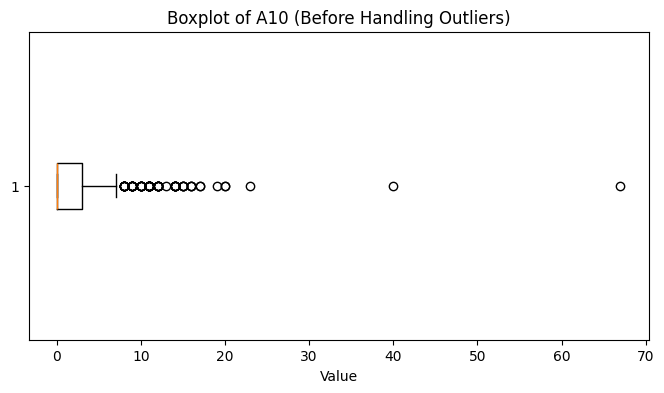

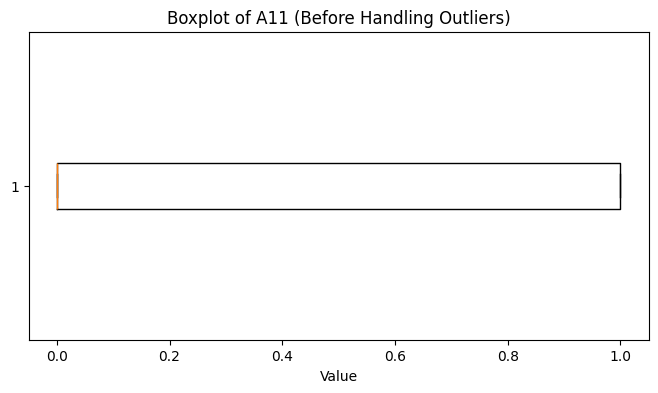

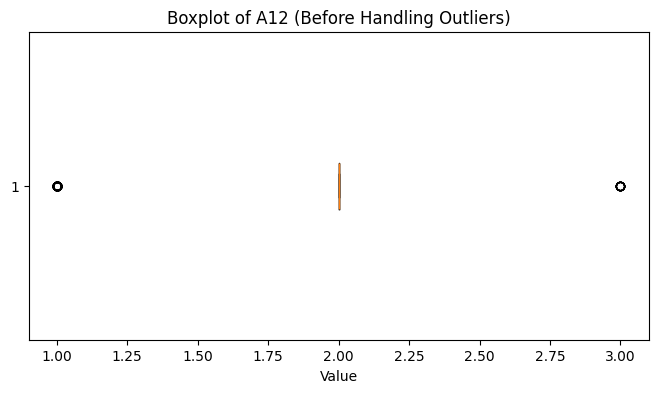

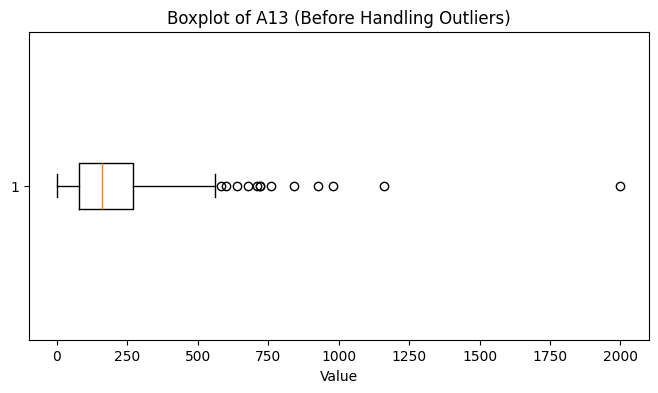

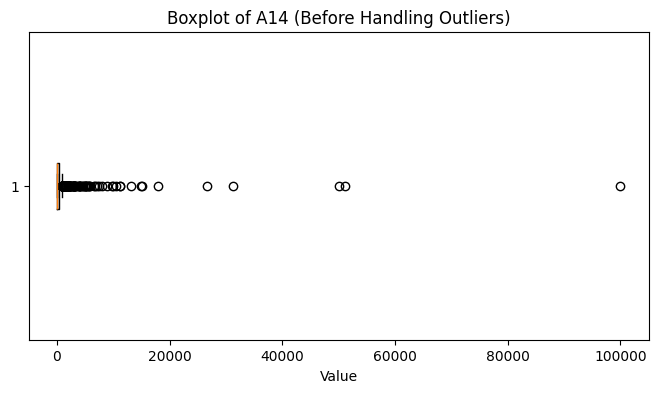

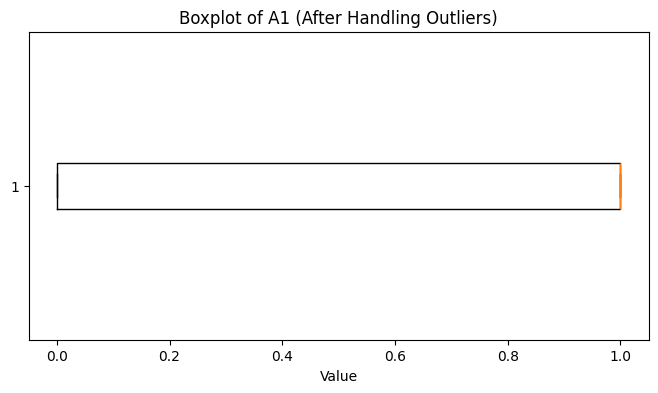

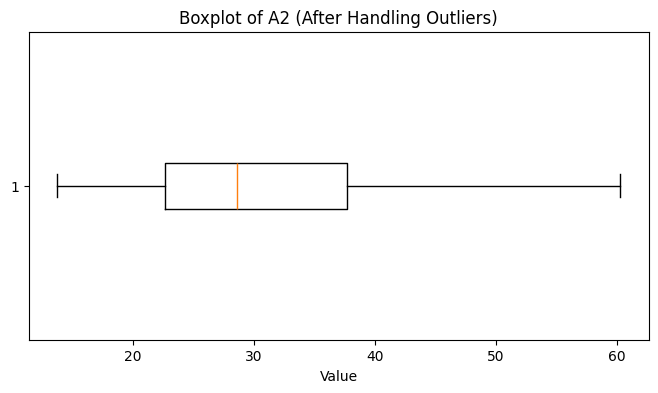

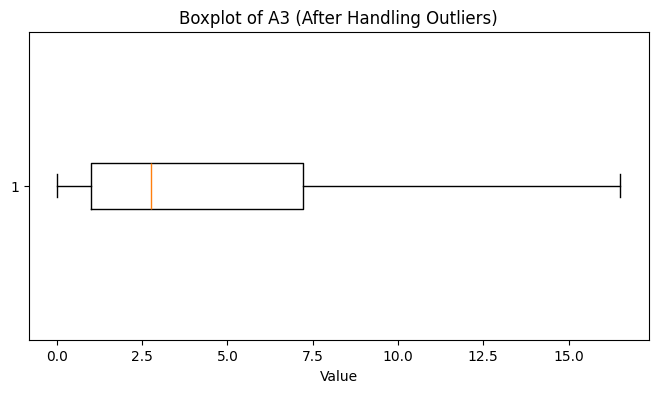

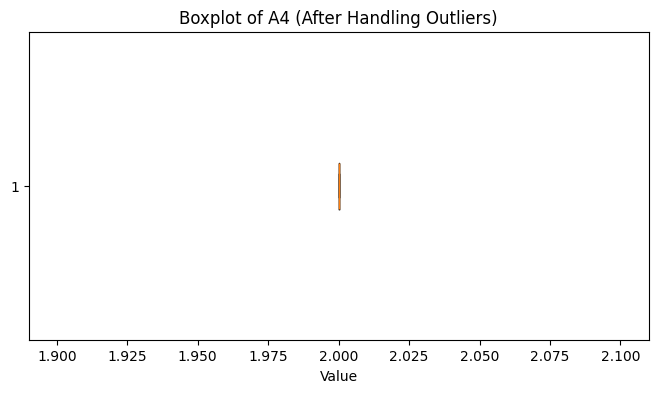

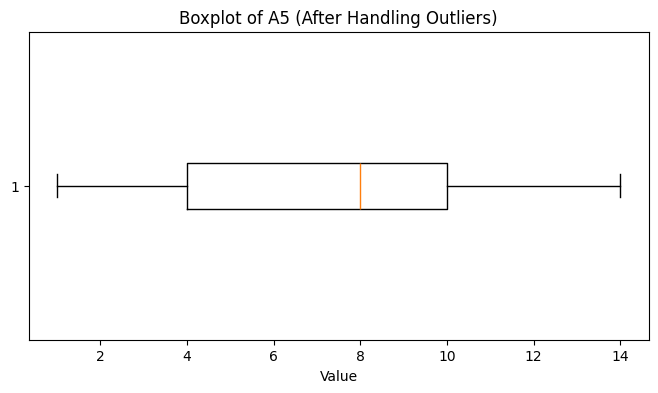

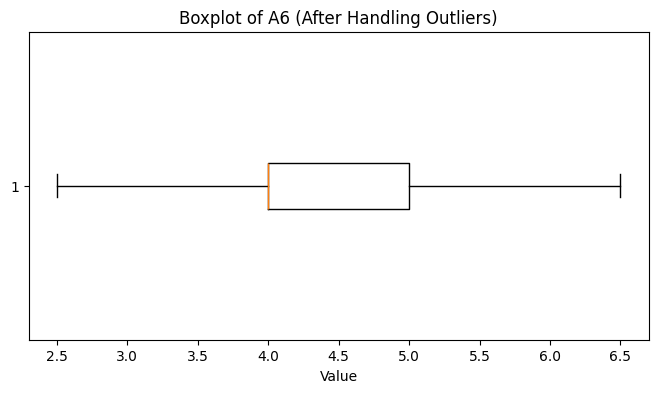

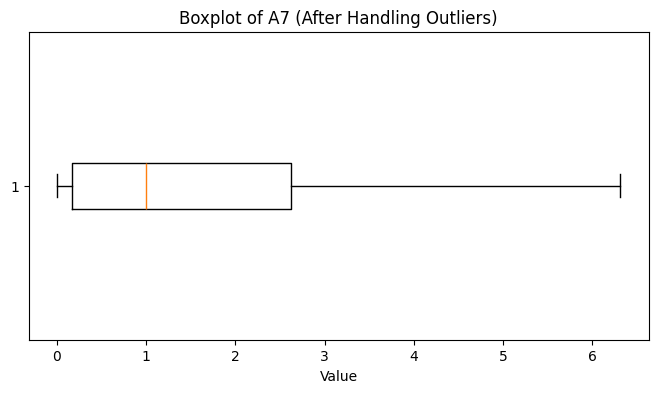

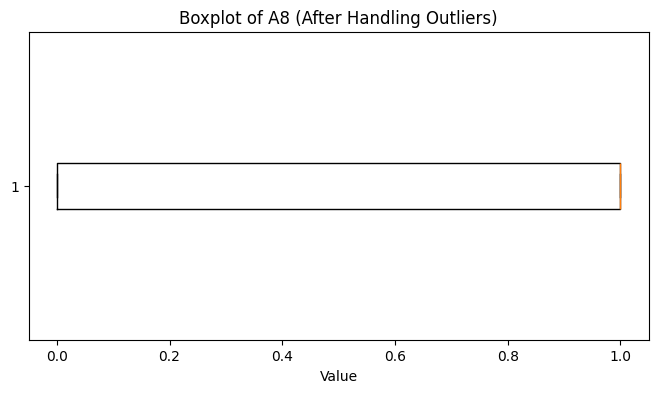

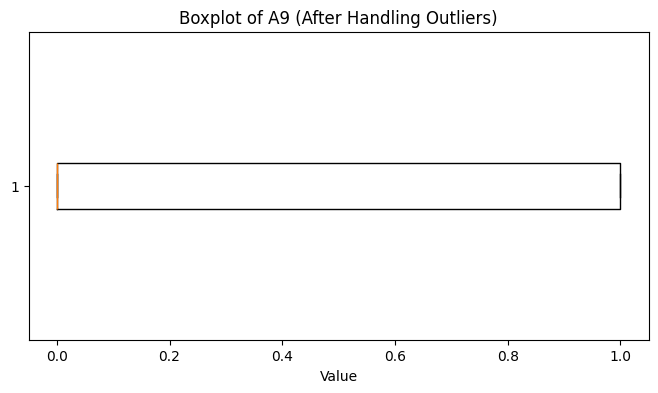

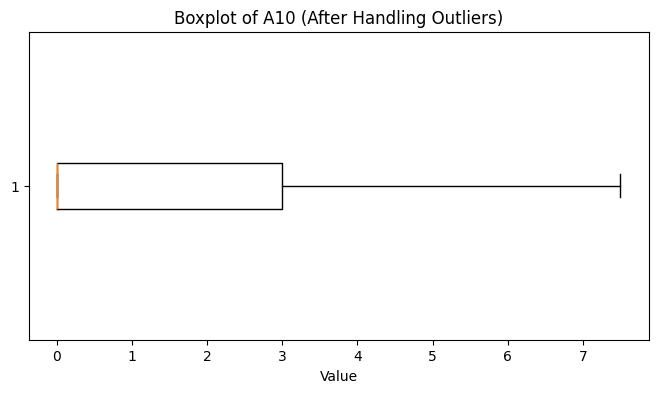

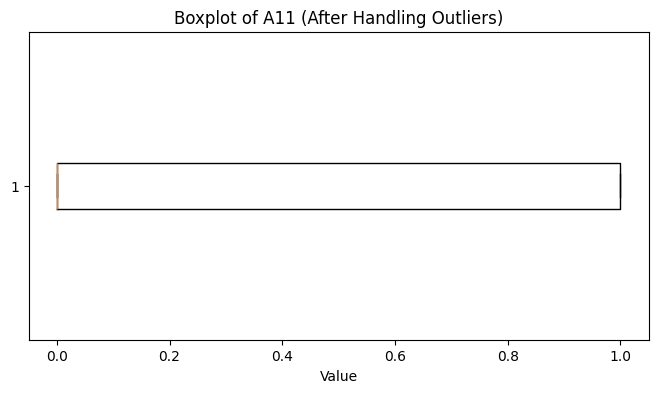

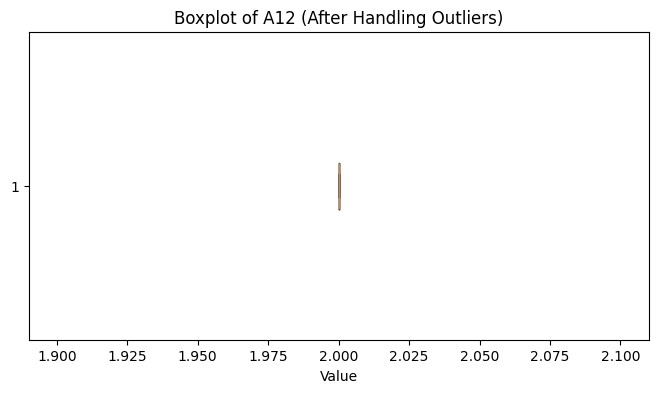

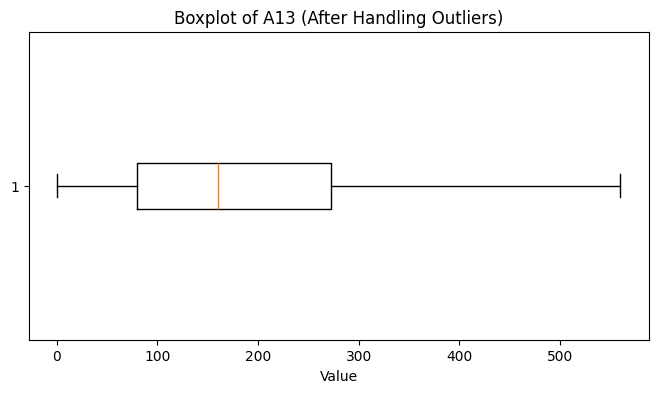

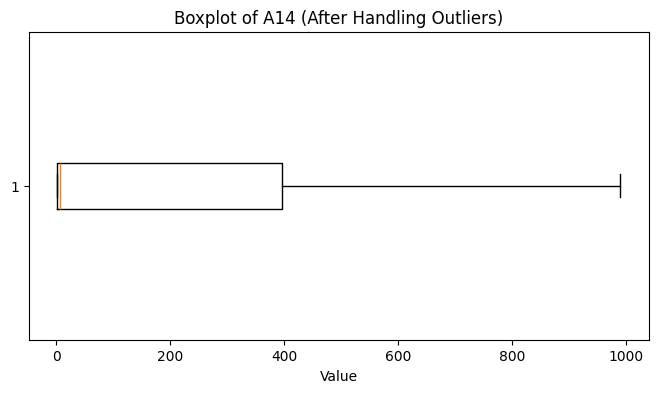

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# List of features to check for outliers
features = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14']

# Function to detect and handle outliers using the IQR method
def handle_outliers_iqr(df, features, method='remove'):
    cleaned_data = df.copy()
    for feature in features:
        Q1 = df[feature].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[feature].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = ((df[feature] < lower_bound) | (df[feature] > upper_bound))

        # Handle outliers based on the method
        if method == 'remove':
            cleaned_data = cleaned_data[~outliers]  # Remove outliers
        elif method == 'cap':
            # Cap values at the bounds
            cleaned_data[feature] = np.where(
                cleaned_data[feature] < lower_bound, lower_bound,
                np.where(cleaned_data[feature] > upper_bound, upper_bound, cleaned_data[feature])
            )
        elif method == 'log_transform':
            # Apply log transformation (only for positive values)
            cleaned_data[feature] = np.log1p(cleaned_data[feature].clip(lower=0.01))

    return cleaned_data

# Visualize outliers before handling
for feature in features:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Boxplot of {feature} (Before Handling Outliers)')
    plt.xlabel('Value')
    plt.show()

# Handle outliers (choose method: 'remove', 'cap', or 'log_transform')
df_cleaned = handle_outliers_iqr(df, features, method='cap')

# Visualize outliers after handling
for feature in features:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_cleaned[feature], vert=False)
    plt.title(f'Boxplot of {feature} (After Handling Outliers)')
    plt.xlabel('Value')
    plt.show()

# Save the cleaned dataset (optional)
# df_cleaned.to_csv('cleaned_dataset.csv', index=False)


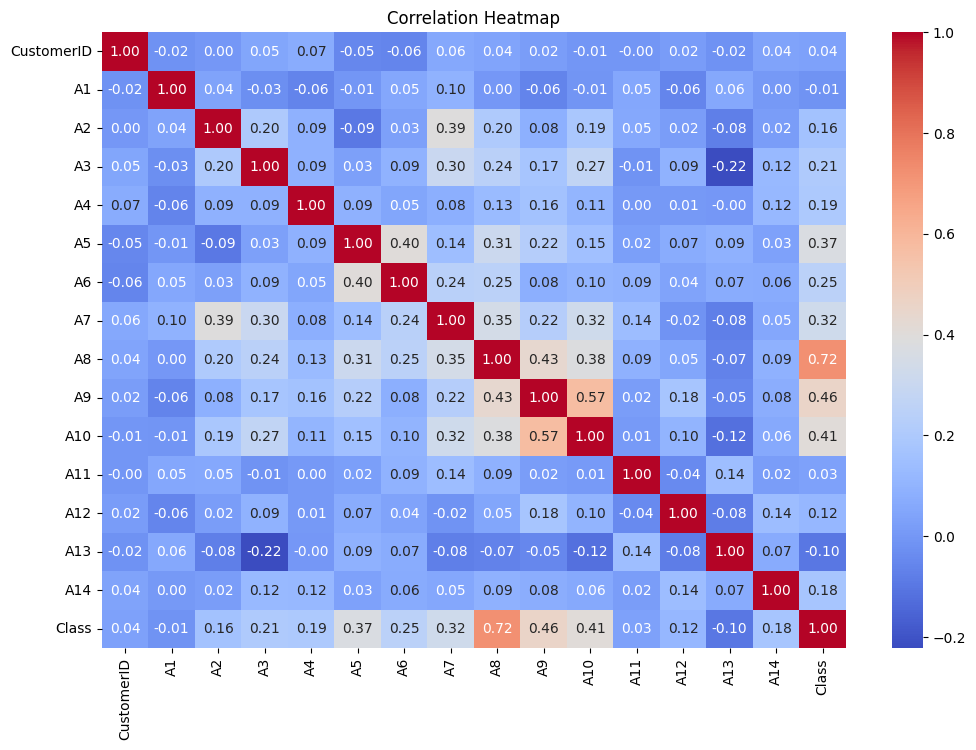

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from scipy.stats import zscore
df['z_scores'] = zscore(df['A1'])
outliers = df[np.abs(df['z_scores']) > 3]  # |Z| > 3


In [ ]:
df['Class'].value_counts()


,count
Class,
0,383
1,307


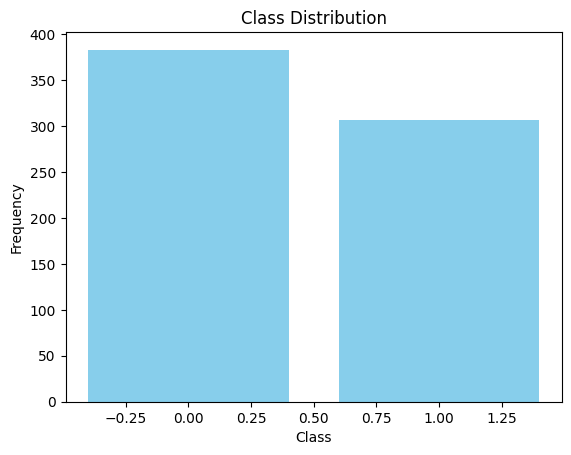

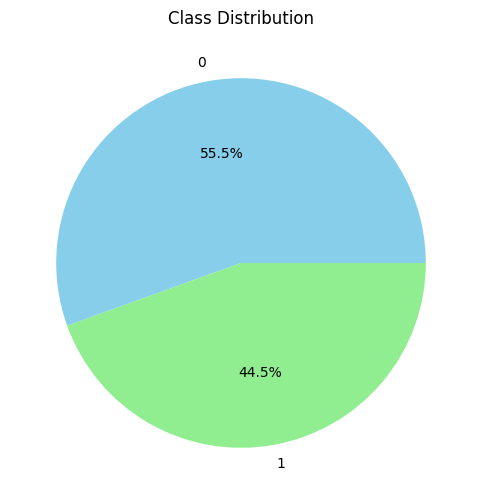

In [ ]:
import matplotlib.pyplot as plt

# Bar plot
class_counts = df['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Pie chart
class_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), colors=['skyblue', 'lightgreen'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the dataset into features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 296, 1: 256})
After SMOTE: Counter({1: 296, 0: 296})


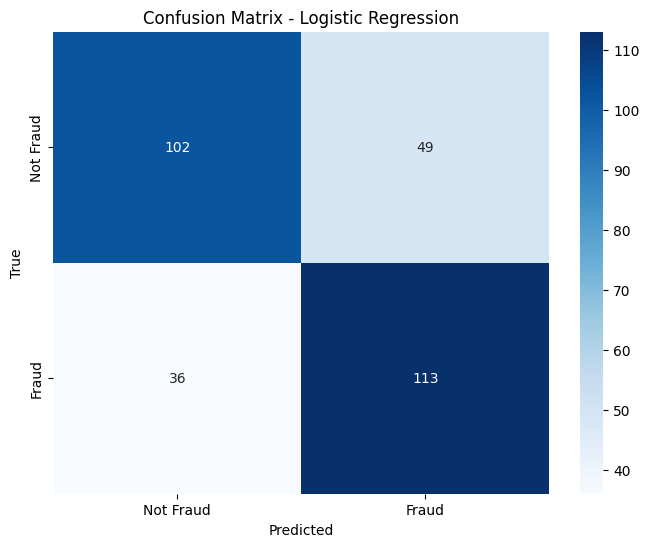

Accuracy: 0.7167
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       151
           1       0.70      0.76      0.73       149

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

# Generate synthetic dataset (or replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       126
           1       0.79      0.75      0.77        81

    accuracy                           0.83       207
   macro avg       0.82      0.81      0.82       207
weighted avg       0.83      0.83      0.83       207



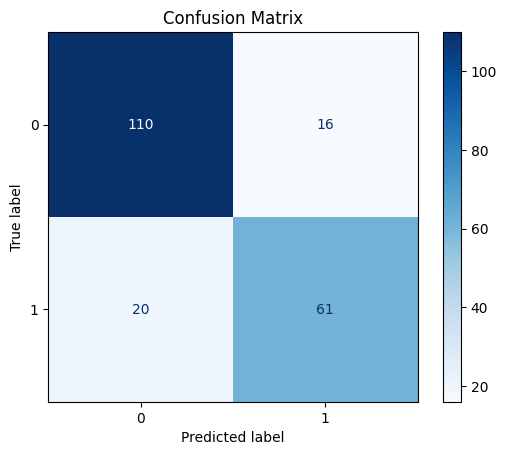

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the data
# Assuming `df` is the DataFrame
features = df.iloc[:, 1:15].values  # Features: A1 to A14
labels = df['Class'].values  # Target: Class

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Define KNN with k=5
knn.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = knn.predict(X_test)

# Step 4: Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()



Evaluating Model: Logistic Regression
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       126
           1       0.81      0.81      0.81        81

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



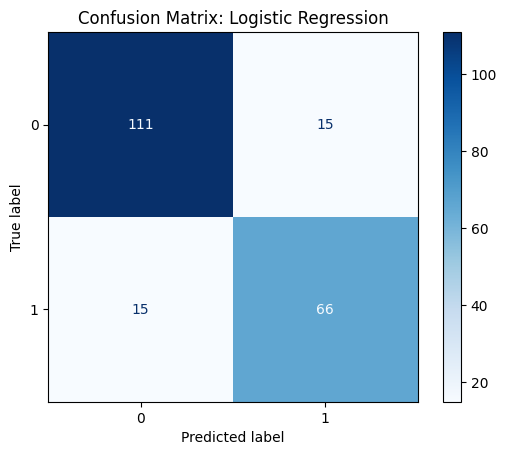


Evaluating Model: Decision Tree
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       126
           1       0.82      0.75      0.79        81

    accuracy                           0.84       207
   macro avg       0.84      0.82      0.83       207
weighted avg       0.84      0.84      0.84       207



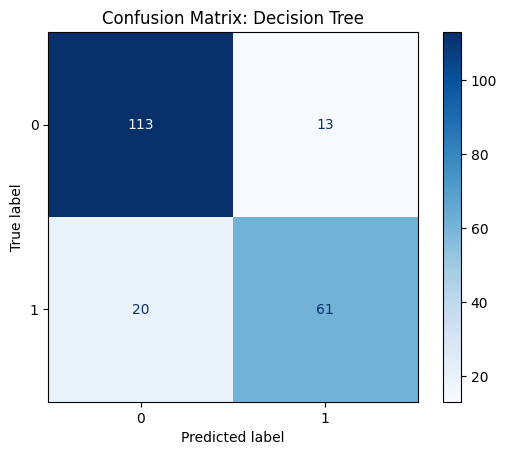


Evaluating Model: Random Forest
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       126
           1       0.85      0.83      0.84        81

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207



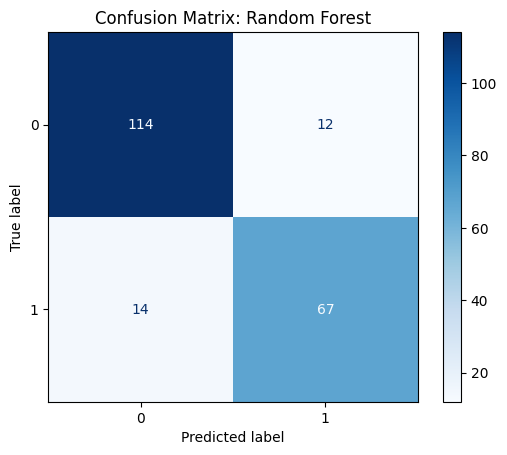


Evaluating Model: Gradient Boosting
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       126
           1       0.84      0.80      0.82        81

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.86       207
weighted avg       0.86      0.86      0.86       207



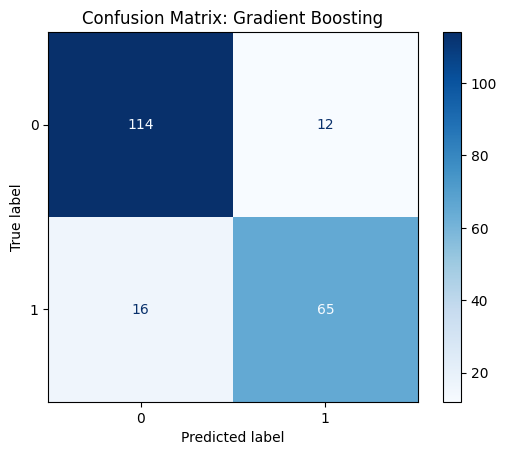


Evaluating Model: Support Vector Machine (SVM)
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       126
           1       0.79      0.85      0.82        81

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



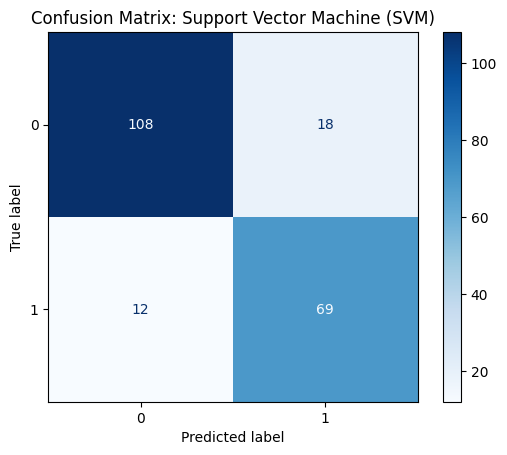


Evaluating Model: Naive Bayes
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       126
           1       0.84      0.70      0.77        81

    accuracy                           0.83       207
   macro avg       0.83      0.81      0.82       207
weighted avg       0.83      0.83      0.83       207



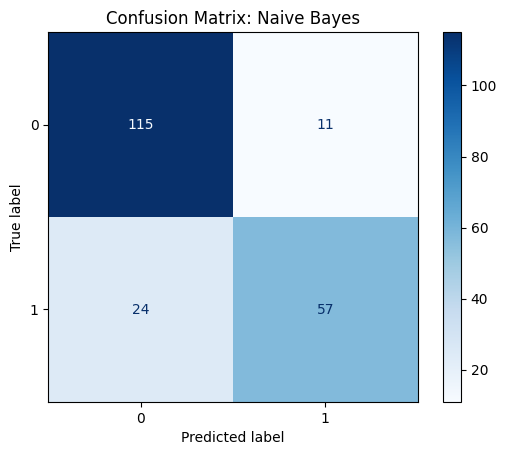


Evaluating Model: XGBoost
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       126
           1       0.82      0.81      0.82        81

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



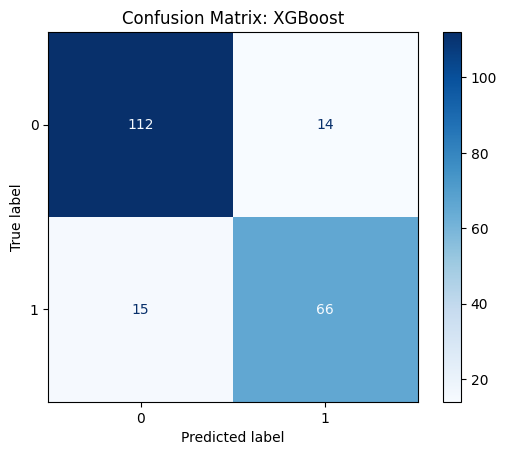

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Prepare the dataset
# Assuming `df` is your DataFrame
features = df.iloc[:, 1:15].values  # Features: A1 to A14
labels = df['Class'].values  # Target: Class

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine (SVM)": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

# Step 3: Train and Evaluate Each Model
for model_name, model in models.items():
    print(f"\n{'='*30}\nEvaluating Model: {model_name}\n{'='*30}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Display metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(labels))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00



Evaluating Model: Logistic Regression
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       126
           1       0.81      0.81      0.81        81

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



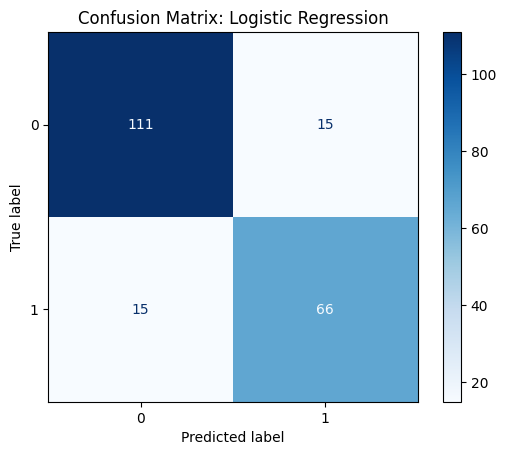


Evaluating Model: Decision Tree
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       126
           1       0.83      0.78      0.80        81

    accuracy                           0.85       207
   macro avg       0.85      0.84      0.84       207
weighted avg       0.85      0.85      0.85       207



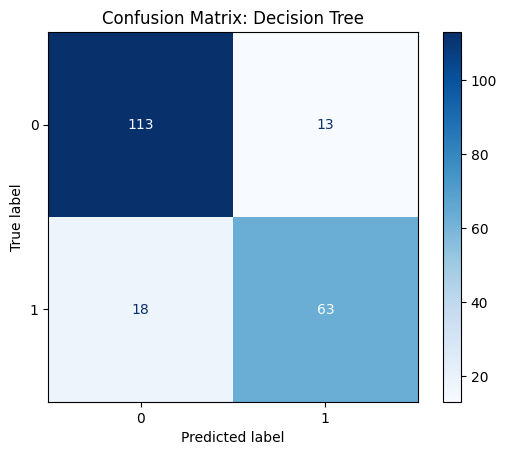


Evaluating Model: Random Forest
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       126
           1       0.85      0.81      0.83        81

    accuracy                           0.87       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.87      0.87      0.87       207



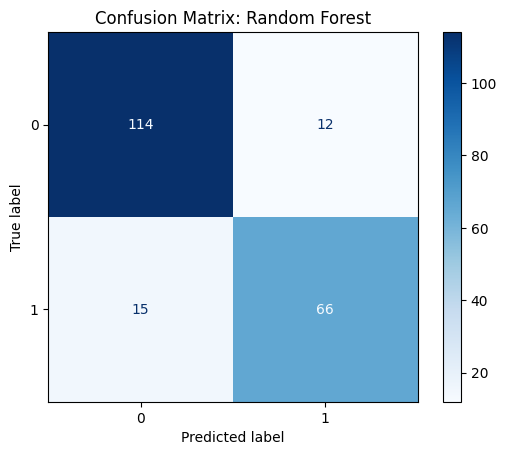


Evaluating Model: Gradient Boosting
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       126
           1       0.84      0.80      0.82        81

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.86       207
weighted avg       0.86      0.86      0.86       207



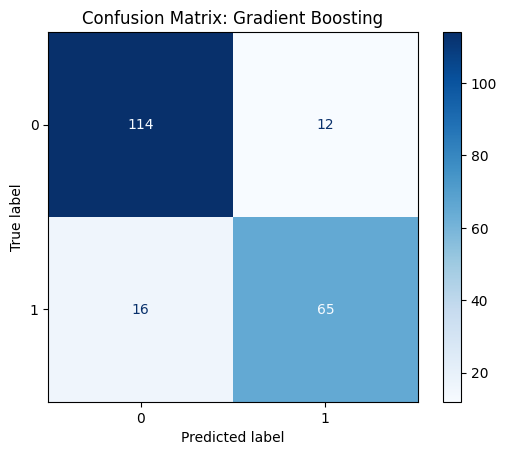


Evaluating Model: Support Vector Machine (SVM)
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       126
           1       0.79      0.85      0.82        81

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



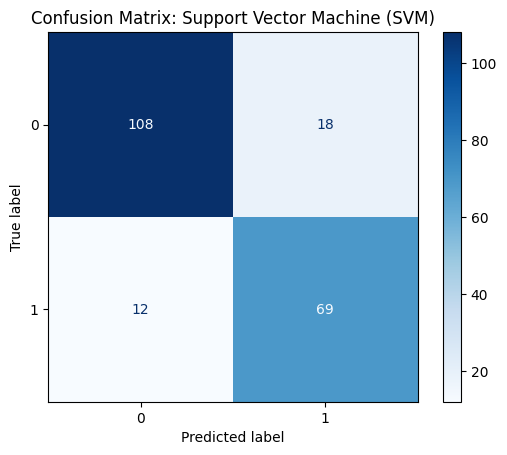


Evaluating Model: Naive Bayes
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       126
           1       0.84      0.70      0.77        81

    accuracy                           0.83       207
   macro avg       0.83      0.81      0.82       207
weighted avg       0.83      0.83      0.83       207



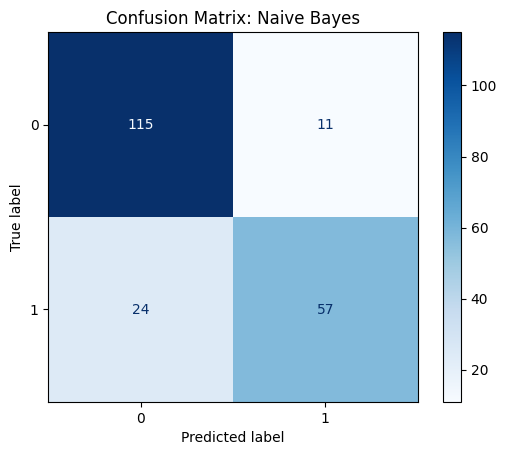


Evaluating Model: XGBoost
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       126
           1       0.82      0.81      0.82        81

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



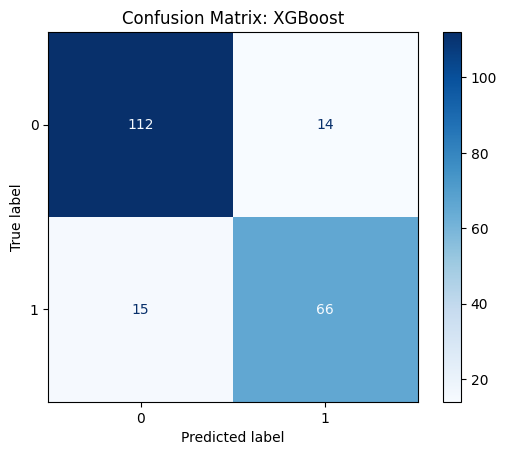


Evaluating Model: Extra Trees
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       126
           1       0.84      0.81      0.82        81

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



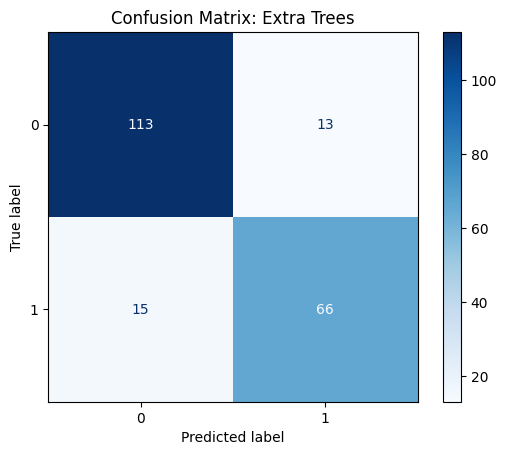


Evaluating Model: LightGBM
[LightGBM] [Info] Number of positive: 226, number of negative: 257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467909 -> initscore=-0.128541
[LightGBM] [Info] Start training from score -0.128541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

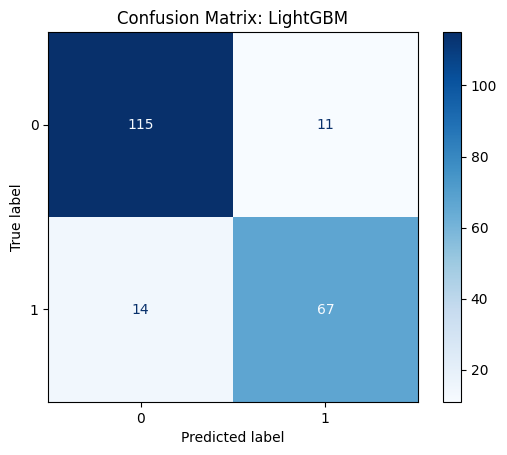


Evaluating Model: CatBoost
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       126
           1       0.84      0.81      0.82        81

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



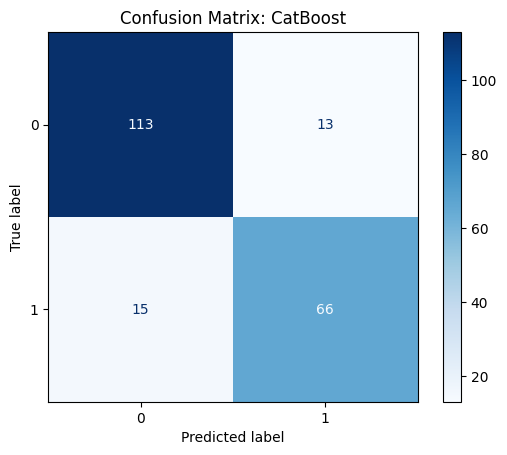


Evaluating Model: K-Nearest Neighbors
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       126
           1       0.79      0.75      0.77        81

    accuracy                           0.83       207
   macro avg       0.82      0.81      0.82       207
weighted avg       0.83      0.83      0.83       207



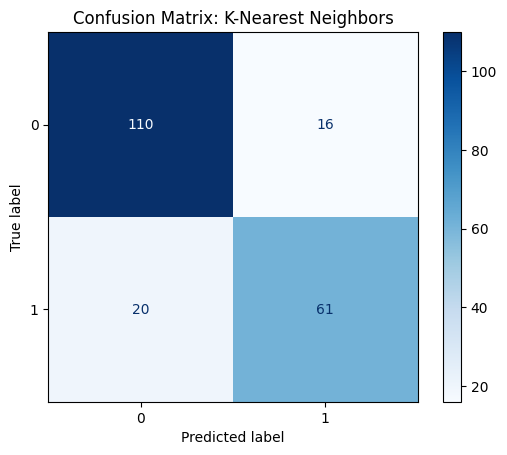


Evaluating Model: AdaBoost
Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1 Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       126
           1       0.82      0.74      0.78        81

    accuracy                           0.84       207
   macro avg       0.83      0.82      0.82       207
weighted avg       0.83      0.84      0.83       207



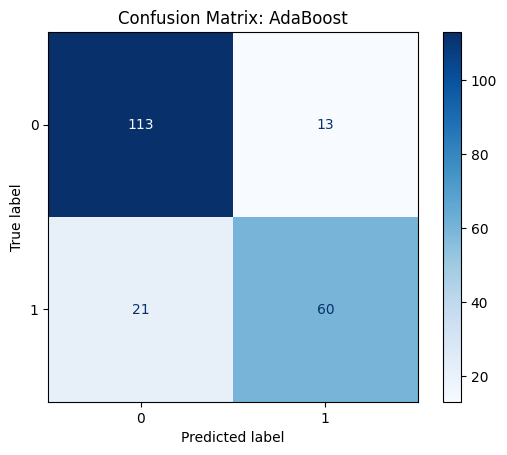


Evaluating Model: Bagging
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       126
           1       0.80      0.79      0.80        81

    accuracy                           0.84       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.84      0.84      0.84       207



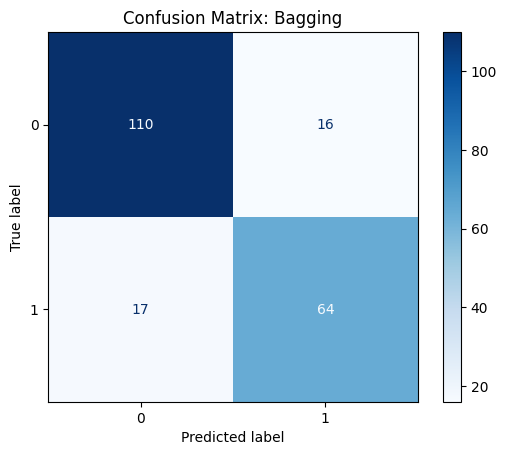


Evaluating Model: Perceptron
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       126
           1       0.78      0.85      0.82        81

    accuracy                           0.85       207
   macro avg       0.84      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



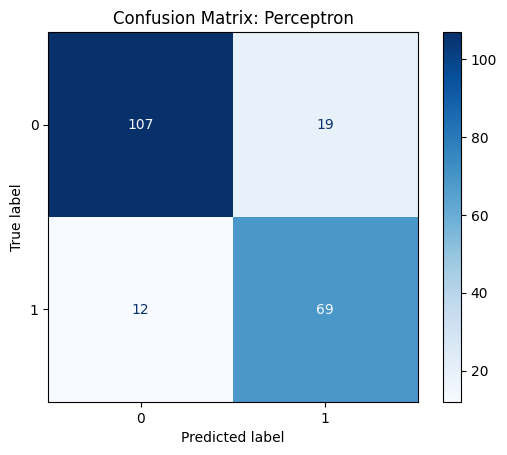

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Adding additional models
additional_models = {
    "Extra Trees": ExtraTreesClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Perceptron": Perceptron()
}

# Combine with previously defined models
all_models = {**models, **additional_models}  # Merge dictionaries

# Train and evaluate each model
for model_name, model in all_models.items():
    print(f"\n{'='*30}\nEvaluating Model: {model_name}\n{'='*30}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Display metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(labels))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()


In [ ]:
import pandas as pd

# Dictionary to store results for all models
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Evaluate each model and store results
for model_name, model in all_models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results to the dictionary
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results using pandas DataFrame's methods
# This replaces the ace_tools call with a standard pandas display
print("Model Performance Comparison:")
print(results_df)  # Or results_df.head() for a concise view

[LightGBM] [Info] Number of positive: 226, number of negative: 257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467909 -> initscore=-0.128541
[LightGBM] [Info] Start training from score -0.128541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define base models
base_models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
    ('LightGBM', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier(verbose=0)),
    ('AdaBoost', AdaBoostClassifier())
]

# Meta-classifier (final layer of stacking)
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions
y_pred = stacked_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display metrics
print(f"Stacked Model Accuracy: {accuracy:.2f}")
print(f"Stacked Model Precision: {precision:.2f}")
print(f"Stacked Model Recall: {recall:.2f}")
print(f"Stacked Model F1 Score: {f1:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


[LightGBM] [Info] Number of positive: 226, number of negative: 257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467909 -> initscore=-0.128541
[LightGBM] [Info] Start training from score -0.128541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Define GNN Model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Step 2: Create GNN Classifier Wrapper
class GNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, hidden_dim=16, output_dim=2, epochs=100, lr=0.01):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.epochs = epochs
        self.lr = lr
        self.model = None

    def fit(self, X, y):
        # Convert data to PyTorch Geometric format
        num_samples = X.shape[0]
        edge_index = torch.tensor(
            [[i, j] for i in range(num_samples) for j in range(num_samples) if i != j],
            dtype=torch.long
        ).t()  # Fully connected graph
        node_features = torch.tensor(X, dtype=torch.float)
        labels = torch.tensor(y, dtype=torch.long)
        data = Data(x=node_features, edge_index=edge_index, y=labels)

        # Initialize GCN model
        self.model = GCN(input_dim=self.input_dim, hidden_dim=self.hidden_dim, output_dim=self.output_dim)
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        # Train the GNN model
        self.model.train()
        for epoch in range(self.epochs):
            optimizer.zero_grad()
            out = self.model(data)
            loss = loss_fn(out, data.y)
            loss.backward()
            optimizer.step()

        self.data = data
        return self

    # The predict method should have the same indentation level as the fit method
    def predict(self, X):
        self.model.eval()

        # Convert prediction data to PyTorch Geometric format
        num_samples = X.shape[0]
        edge_index = torch.tensor(
            [[i, j] for i in range(num_samples) for j in range(num_samples) if i != j],
            dtype=torch.long
        ).t()  # Fully connected graph for prediction data
        node_features = torch.tensor(X, dtype=torch.float)
        data = Data(x=node_features, edge_index=edge_index)  # Create Data object for prediction

        with torch.no_grad():
            logits = self.model(data)  # Use the prediction data
            predictions = logits.argmax(dim=1).numpy()
        return predictions


# Step 3: Prepare Dataset
# Example Dataset
np.random.seed(42)
data_size = 100
features = np.random.rand(data_size, 14)  # 14 features
labels = np.random.choice([0, 1], size=data_size)  # Binary class labels
df = pd.DataFrame(features, columns=[f"A{i}" for i in range(1, 15)])
df["Class"] = labels

X = df.iloc[:, :-1].values  # Features
y = df["Class"].values  # Labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define Base Models with GNN
base_models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('GNN', GNNClassifier(input_dim=X_train.shape[1]))
]

# Meta-classifier
meta_classifier = LogisticRegression()

# Step 5: Stacking with GNN
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)

# Train and Evaluate Stacked Model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Evaluate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display Metrics
print(f"Stacked Model Accuracy: {accuracy:.2f}")
print(f"Stacked Model Precision: {precision:.2f}")
print(f"Stacked Model Recall: {recall:.2f}")
print(f"Stacked Model F1 Score: {f1:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Stacked Model Accuracy: 0.47
Stacked Model Precision: 0.47
Stacked Model Recall: 0.47
Stacked Model F1 Score: 0.46

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.57      0.50        14
           1       0.50      0.38      0.43        16

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.46        30
weighted avg       0.47      0.47      0.46        30


Confusion Matrix:
[[ 8  6]
 [10  6]]


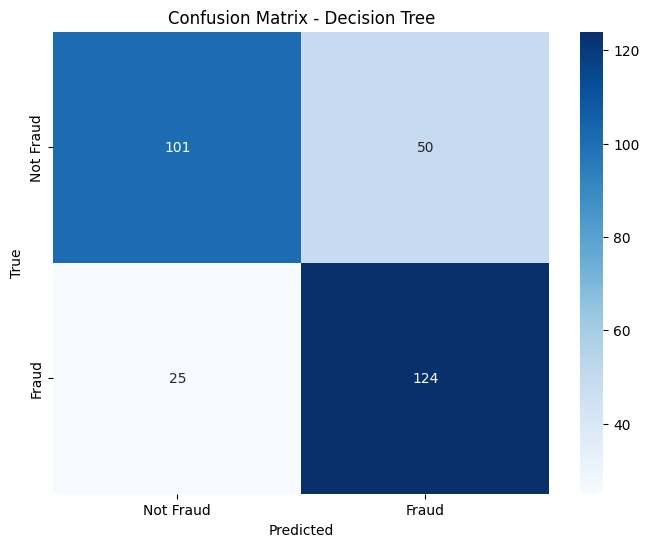

Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       151
           1       0.71      0.83      0.77       149

    accuracy                           0.75       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic dataset (or replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)  # You can adjust the max_depth as needed
dt.fit(X_train, y_train)

# Predict the test set
y_pred = dt.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


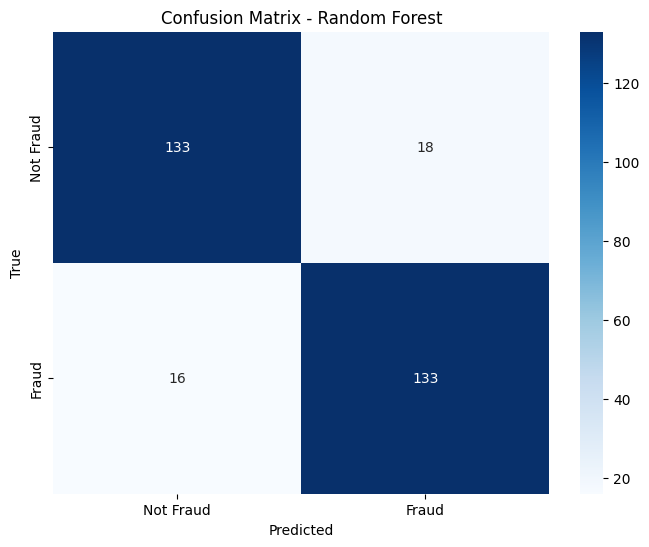

Accuracy: 0.8867
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       151
           1       0.88      0.89      0.89       149

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic dataset (or replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
rf.fit(X_train, y_train)

# Predict the test set
y_pred = rf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


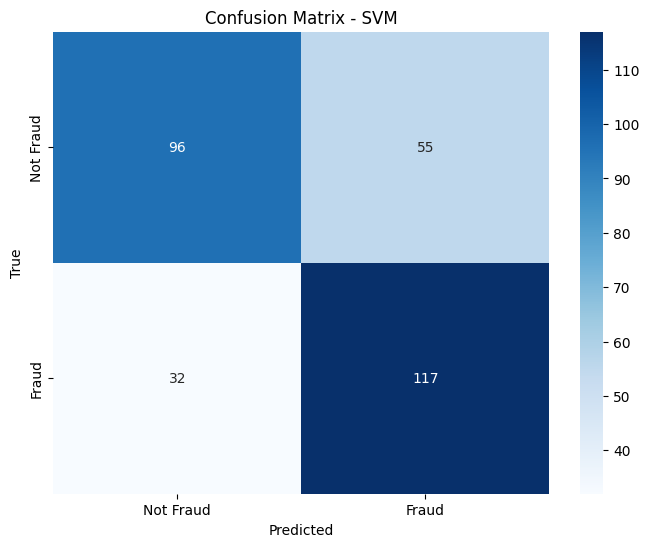

Accuracy: 0.7100
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       151
           1       0.68      0.79      0.73       149

    accuracy                           0.71       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.72      0.71      0.71       300



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic dataset (or replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Support Vector Machine model
svm = SVC(kernel='linear', probability=True, random_state=42)  # Linear kernel, enable probability estimates for ROC curve
svm.fit(X_train, y_train)

# Predict the test set
y_pred = svm.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


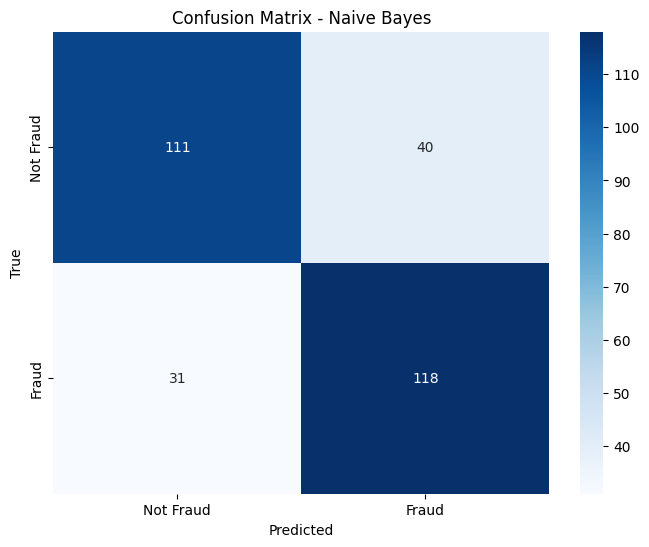

Accuracy: 0.7633
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       151
           1       0.75      0.79      0.77       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic dataset (or replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict the test set
y_pred = nb.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import numpy as np

# Step 1: Load Data
# Assuming `df` is your pandas DataFrame containing the dataset
# Features: A1 to A14, Label: Class, Node Identifier: CustomerID
features = df.iloc[:, 1:15].values  # Extract features A1 to A14
labels = df['Class'].values  # Extract Class labels
customer_ids = df['CustomerID'].values  # Extract Customer IDs

# Convert features and labels to PyTorch tensors
node_features = torch.tensor(features, dtype=torch.float)
node_labels = torch.tensor(labels, dtype=torch.long)

# Step 2: Define Edges
# Example: Constructing edges based on similarity (Euclidean distance threshold)
num_nodes = len(customer_ids)
edge_index = []
threshold = 1.0  # Define a threshold for similarity (you can adjust this)

for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j:
            distance = np.linalg.norm(features[i] - features[j])
            if distance < threshold:
                edge_index.append([i, j])

# Convert edge list to PyTorch tensor
edge_index = torch.tensor(edge_index, dtype=torch.long).t()  # Transpose to match PyTorch Geometric format

# Step 3: Create PyTorch Geometric Data Object
data = Data(x=node_features, edge_index=edge_index, y=node_labels)

# Step 4: Define GNN Model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Step 5: Initialize Model, Optimizer, and Loss
model = GCN(input_dim=node_features.shape[1], hidden_dim=16, output_dim=len(set(labels)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

# Step 6: Training Loop
model.train()
for epoch in range(100):  # Number of epochs
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    loss = loss_fn(out, data.y)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Step 7: Evaluate Model
model.eval()
_, pred = model(data).max(dim=1)  # Get predictions
accuracy = pred.eq(data.y).sum().item() / data.y.size(0)
print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch 1, Loss: 31.49677848815918
Epoch 2, Loss: 14.836124420166016
Epoch 3, Loss: 8.978691101074219
Epoch 4, Loss: 14.320697784423828
Epoch 5, Loss: 15.528024673461914
Epoch 6, Loss: 11.840042114257812
Epoch 7, Loss: 9.310514450073242
Epoch 8, Loss: 8.228462219238281
Epoch 9, Loss: 8.371745109558105
Epoch 10, Loss: 10.002259254455566
Epoch 11, Loss: 10.331876754760742
Epoch 12, Loss: 8.956232070922852
Epoch 13, Loss: 6.903639316558838
Epoch 14, Loss: 5.84206485748291
Epoch 15, Loss: 5.909858703613281
Epoch 16, Loss: 6.515603542327881
Epoch 17, Loss: 6.627700328826904
Epoch 18, Loss: 5.444769859313965
Epoch 19, Loss: 3.953582763671875
Epoch 20, Loss: 4.174964427947998
Epoch 21, Loss: 4.839099407196045
Epoch 22, Loss: 4.674355983734131
Epoch 23, Loss: 3.6197993755340576
Epoch 24, Loss: 2.6815552711486816
Epoch 25, Loss: 3.0521209239959717
Epoch 26, Loss: 3.2834722995758057
Epoch 27, Loss: 2.7210893630981445
Epoch 28, Loss: 2.3101093769073486
Epoch 29, Loss: 2.4072329998016357
Epoch 30, L

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       383
           1       0.79      0.75      0.77       307

    accuracy                           0.80       690
   macro avg       0.80      0.80      0.80       690
weighted avg       0.80      0.80      0.80       690



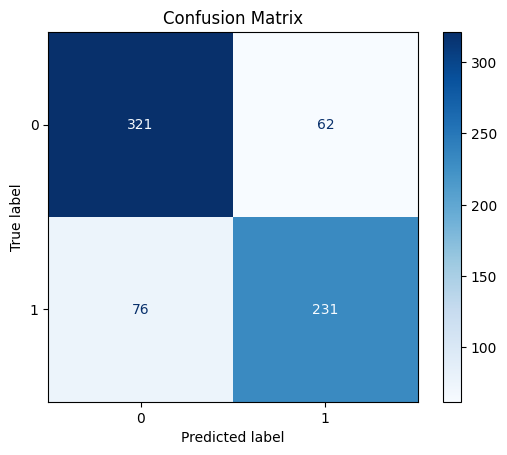

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt

# True labels and predictions
true_labels = data.y.cpu().numpy()
pred_labels = pred.cpu().numpy()

# Step 8: Compute Metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='weighted')
recall = recall_score(true_labels, pred_labels, average='weighted')
f1 = f1_score(true_labels, pred_labels, average='weighted')

# Display Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels))

# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(true_labels))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


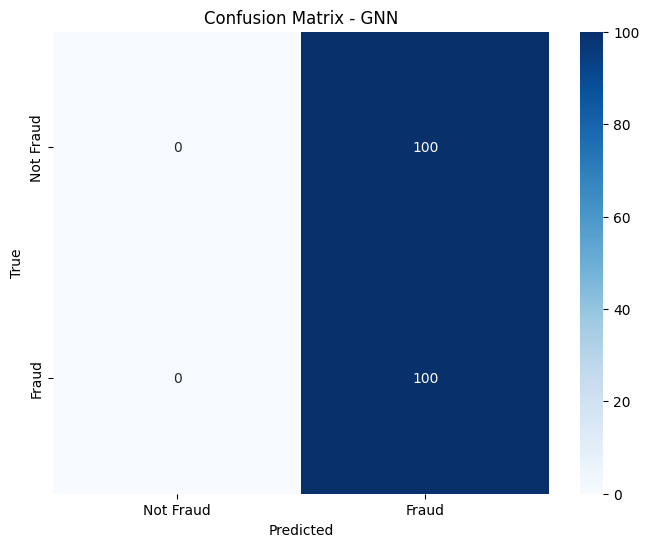

Accuracy: 0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.50      1.00      0.67       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
import numpy as np
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import torch_geometric.nn as pyg_nn
from sklearn.preprocessing import StandardScaler

# Generate or load your dataset here (replace with actual dataset)
# X = feature data, y = labels (fraud vs not fraud)

# For demonstration, using random data
X = np.random.rand(1000, 10)  # 1000 samples, 10 features (adjust according to your dataset)
y = np.random.randint(0, 2, 1000)  # Binary labels (0: not fraud, 1: fraud)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scaling the features for better performance

# Convert dataset to PyTorch tensors
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)

# Construct the edge_index for the graph (fully connected graph for simplicity)
edge_index = torch.combinations(torch.arange(len(X)), r=2).t().contiguous()

# Create PyTorch Geometric Data object
data = Data(x=X, edge_index=edge_index, y=y)

# Split the data into train and test sets (80-20 split)
train_size = int(0.8 * len(data.y))
test_size = len(data.y) - train_size

train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
train_mask[:train_size] = True

# Create a mask for testing nodes
test_mask = ~train_mask  # Invert the train_mask

# Now, use the masks to access the training and testing data
train_data = data.subgraph(train_mask)
test_data = data.subgraph(test_mask)

# Define a simple Graph Neural Network model (GNN)
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels=10, out_channels=64)  # Increased output channels
        self.conv2 = pyg_nn.GCNConv(in_channels=64, out_channels=32)   # Adjusted to improve model complexity
        self.dropout = nn.Dropout(0.5)  # Added dropout layer to prevent overfitting
        self.fc = nn.Linear(32, 2)  # Output layer (2 classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))  # Apply GCN layer 1
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.conv2(x, edge_index))  # Apply GCN layer 2
        x = self.fc(x)  # Apply final classification layer
        return torch.softmax(x, dim=1)  # Softmax for classification probabilities

# Initialize the GNN model
model = GNNModel()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Lower learning rate for better convergence

# Training function
def train_model(model, train_data, criterion, optimizer, epochs=100):  # Increased epochs
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(train_data)
        loss = criterion(output, train_data.y)
        loss.backward()
        optimizer.step()

# Train the GNN model
train_model(model, train_data, criterion, optimizer, epochs=100)

# Evaluation function
def evaluate_model(model, test_data):
    model.eval()
    with torch.no_grad():
        output = model(test_data)
        _, predicted = torch.max(output, 1)  # Get the class with the highest score
        y_pred = predicted.cpu().numpy()
        y_true = test_data.y.cpu().numpy()
    return y_true, y_pred

# Evaluate the model on test data
y_true, y_pred = evaluate_model(model, test_data)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - GNN')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Adjust threshold
threshold = 0.3
y_pred_adjusted = (y_probs >= threshold).astype(int)


In [ ]:
from xgboost import XGBClassifier

# Model with class imbalance handling
model = XGBClassifier(scale_pos_weight=10, random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc}")


              precision    recall  f1-score   support

           0       0.74      0.68      0.71       151
           1       0.70      0.76      0.73       149

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

ROC-AUC Score: 0.7705675807813679


In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

# Easy Ensemble Classifier
model = EasyEnsembleClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.69      0.70       151
           1       0.69      0.70      0.70       149

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



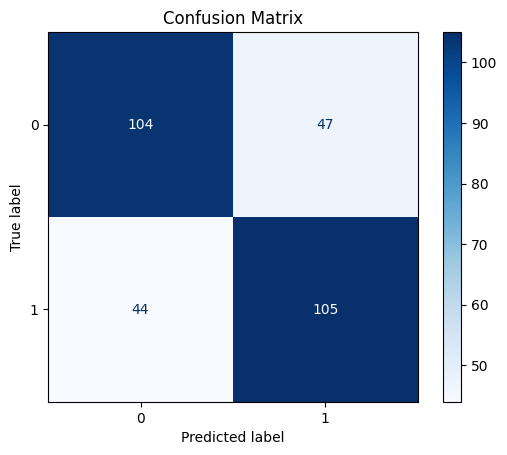

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have predictions and true labels
# y_test: true labels
# y_pred: predicted labels from your model

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Adjust labels as needed
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


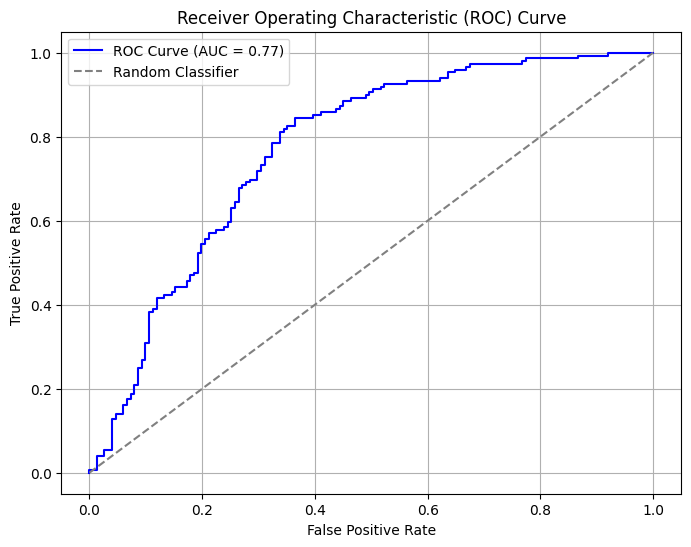

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities and true labels
# y_test: true labels
# y_probs: predicted probabilities for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


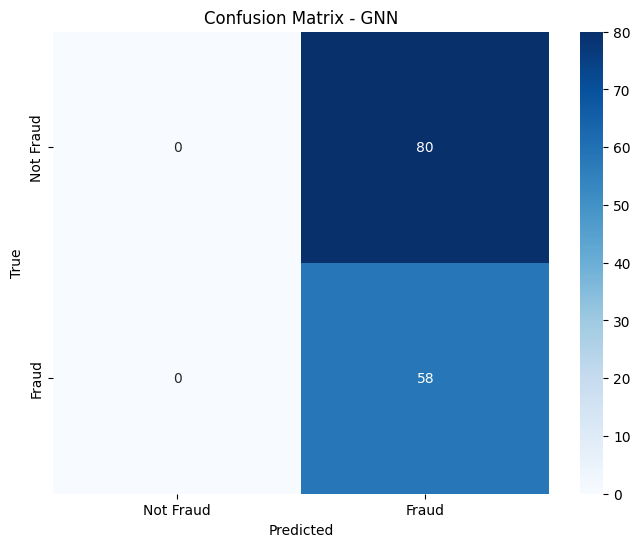

Accuracy (GNN): 0.4203
Accuracy Table:
                        Model  Accuracy
0         Logistic Regression  0.716667
1               Decision Tree  0.796667
2                         SVM  0.913333
3         K-Nearest Neighbors  0.896667
4                     XGBoost  0.883333
5  Graph Neural Network (GNN)  0.420290


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import torch_geometric.nn as pyg_nn
from torch_geometric.data import Data

# Load dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with actual dataset loading code

# Features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your target column
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scaling the features for better performance

# Convert dataset to PyTorch tensors
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y.values, dtype=torch.long)

# Construct the edge_index for the graph (fully connected graph for simplicity)
edge_index = torch.combinations(torch.arange(len(X)), r=2).t().contiguous()

# Create PyTorch Geometric Data object
data = Data(x=X, edge_index=edge_index, y=y)

# Split the data into train and test sets (80-20 split)
train_size = int(0.8 * len(data.y))
test_size = len(data.y) - train_size

train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
train_mask[:train_size] = True

# Create a mask for testing nodes
test_mask = ~train_mask  # Invert the train_mask

# Now, use the masks to access the training and testing data
train_data = data.subgraph(train_mask)
test_data = data.subgraph(test_mask)

# Define a simple Graph Neural Network model (GNN)
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels=X.shape[1], out_channels=64)  # Increased output channels
        self.conv2 = pyg_nn.GCNConv(in_channels=64, out_channels=32)   # Adjusted to improve model complexity
        self.dropout = nn.Dropout(0.5)  # Added dropout layer to prevent overfitting
        self.fc = nn.Linear(32, 2)  # Output layer (2 classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))  # Apply GCN layer 1
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.conv2(x, edge_index))  # Apply GCN layer 2
        x = self.fc(x)  # Apply final classification layer
        return torch.softmax(x, dim=1)  # Softmax for classification probabilities

# Initialize the GNN model
gnn_model = GNNModel()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gnn_model.parameters(), lr=0.001)  # Lower learning rate for better convergence

# Training function for GNN
def train_model(model, train_data, criterion, optimizer, epochs=100):  # Increased epochs
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(train_data)
        loss = criterion(output, train_data.y)
        loss.backward()
        optimizer.step()

# Train the GNN model
train_model(gnn_model, train_data, criterion, optimizer, epochs=100)

# Evaluation function for GNN
def evaluate_model(model, test_data):
    model.eval()
    with torch.no_grad():
        output = model(test_data)
        _, predicted = torch.max(output, 1)  # Get the class with the highest score
        y_pred = predicted.cpu().numpy()
        y_true = test_data.y.cpu().numpy()
    return y_true, y_pred

# Evaluate the GNN model on test data
y_true, y_pred = evaluate_model(gnn_model, test_data)

# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix

# Plotting the confusion matrix for GNN
cm = confusion_matrix(y_true, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - GNN')
plt.show()

# Accuracy score for GNN
gnn_accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy (GNN): {gnn_accuracy:.4f}')

# Models to evaluate for comparison (Logistic Regression, Decision Tree, etc.)
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Train and evaluate the classical models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_classical = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_classical)
    results.append({"Model": name, "Accuracy": accuracy})

# Adding GNN results to the list
results.append({"Model": "Graph Neural Network (GNN)", "Accuracy": gnn_accuracy})

# Create results table
results_df = pd.DataFrame(results)

# Display accuracy table
print("Accuracy Table:")
print(results_df)

# Save the table (optional)
# results_df.to_csv("model_accuracies.csv", index=False)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
import torch_geometric.nn as pyg_nn
from torch_geometric.data import Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset (replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your target column
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scaling the features for better performance

# Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert dataset to PyTorch tensors for GNN
X_tensor = torch.tensor(X_train, dtype=torch.float)
y_tensor = torch.tensor(y_train.values, dtype=torch.long)

# Create a valid edge_index for a graph (fully connected graph or use k-NN)
num_nodes = len(X_train)
edge_index = torch.empty((2, 0), dtype=torch.long)

# Create a fully connected graph for demonstration
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

# Create PyTorch Geometric Data object
train_data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)

# Define a simple Graph Neural Network model (GNN)
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels=X_train.shape[1], out_channels=64)  # Adjusted output channels
        self.conv2 = pyg_nn.GCNConv(in_channels=64, out_channels=32)   # Adjusted model complexity
        self.fc = nn.Linear(32, 2)  # Output layer (2 classes: fraud, not fraud)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))  # Apply GCN layer 1
        x = torch.relu(self.conv2(x, edge_index))  # Apply GCN layer 2
        x = self.fc(x)  # Apply final classification layer
        return torch.softmax(x, dim=1)  # Softmax for classification probabilities

# Initialize the GNN model
gnn_model = GNNModel()

# Define loss and optimizer for GNN
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gnn_model.parameters(), lr=0.001)

# Training function for GNN
def train_model(model, train_data, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(train_data)
        loss = criterion(output, train_data.y)
        loss.backward()
        optimizer.step()

# Train the GNN model
train_model(gnn_model, train_data, criterion, optimizer, epochs=100)

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        # Create test data in a similar way (assuming X_test is already available)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float)
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

        # Create the edge index for the test data (same method as for train_data)
        edge_index = torch.empty((2, 0), dtype=torch.long)
        for i in range(len(X_test)):
            for j in range(i + 1, len(X_test)):
                edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

        test_data = Data(x=X_test_tensor, edge_index=edge_index, y=y_test_tensor)

        output = model(test_data)
        _, predicted = torch.max(output, 1)
        y_pred = predicted.cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()

    return y_true, y_pred

# Get predictions and evaluate
y_true, y_pred = evaluate_model(gnn_model, X_test, y_test)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))


Accuracy: 0.6304
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        87
           1       0.00      0.00      0.00        51

    accuracy                           0.63       138
   macro avg       0.32      0.50      0.39       138
weighted avg       0.40      0.63      0.49       138



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
import torch_geometric.nn as pyg_nn
from torch_geometric.data import Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset (replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your target column
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scaling the features for better performance

# Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert dataset to PyTorch tensors for GNN
X_tensor = torch.tensor(X_train, dtype=torch.float)
y_tensor = torch.tensor(y_train.values, dtype=torch.long)

# Create a valid edge_index for a graph (fully connected graph or use k-NN)
num_nodes = len(X_train)
edge_index = torch.empty((2, 0), dtype=torch.long)

# Create a fully connected graph for demonstration
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

# Create PyTorch Geometric Data object
train_data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)

# Define a simple Graph Neural Network model (GNN)
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels=X_train.shape[1], out_channels=64)  # Adjusted output channels
        self.conv2 = pyg_nn.GCNConv(in_channels=64, out_channels=32)   # Adjusted model complexity
        self.fc = nn.Linear(32, 2)  # Output layer (2 classes: fraud, not fraud)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))  # Apply GCN layer 1
        x = torch.relu(self.conv2(x, edge_index))  # Apply GCN layer 2
        x = self.fc(x)  # Apply final classification layer
        return torch.softmax(x, dim=1)  # Softmax for classification probabilities

# Initialize the GNN model
gnn_model = GNNModel()

# Define loss and optimizer for GNN
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gnn_model.parameters(), lr=0.001)

# Training function for GNN
def train_model(model, train_data, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(train_data)
        loss = criterion(output, train_data.y)
        loss.backward()
        optimizer.step()

# Train the GNN model
train_model(gnn_model, train_data, criterion, optimizer, epochs=100)

# Evaluate the GNN model
def evaluate_model_gnn(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        # Create test data in a similar way (assuming X_test is already available)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float)
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

        # Create the edge index for the test data (same method as for train_data)
        edge_index = torch.empty((2, 0), dtype=torch.long)
        for i in range(len(X_test)):
            for j in range(i + 1, len(X_test)):
                edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

        test_data = Data(x=X_test_tensor, edge_index=edge_index, y=y_test_tensor)

        output = model(test_data)
        _, predicted = torch.max(output, 1)
        y_pred = predicted.cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()

    return y_true, y_pred

# Get predictions from GNN model
y_true_gnn, y_pred_gnn = evaluate_model_gnn(gnn_model, X_test, y_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Combine the base model predictions (GNN and Random Forest) into a stacked model
# Using logistic regression as a meta-classifier

# Prepare stacked dataset (predictions from GNN and RF as features)
stacked_train = pd.DataFrame({
    'gnn_pred': y_pred_gnn,
    'rf_pred': y_pred_rf
})

stacked_test = pd.DataFrame({
    'gnn_pred': y_pred_gnn,
    'rf_pred': y_pred_rf
})

# Meta-classifier: Logistic Regression
meta_classifier = LogisticRegression()
meta_classifier.fit(stacked_train, y_test)

# Evaluate the stacked model
y_pred_stack = meta_classifier.predict(stacked_test)

# Accuracy and classification report
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f'Ensemble (Stacking) Accuracy: {accuracy_stack:.4f}')

# Classification report
print("Classification Report for Stacked Model:")
print(classification_report(y_test, y_pred_stack))



Ensemble (Stacking) Accuracy: 0.8841
Classification Report for Stacked Model:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        87
           1       0.86      0.82      0.84        51

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
import torch_geometric.nn as pyg_nn
from torch_geometric.data import Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset (replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your target column
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scaling the features for better performance

# Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert dataset to PyTorch tensors for GNN
X_tensor = torch.tensor(X_train, dtype=torch.float)
y_tensor = torch.tensor(y_train.values, dtype=torch.long)

# Create a valid edge_index for a graph (fully connected graph or use k-NN)
num_nodes = len(X_train)
edge_index = torch.empty((2, 0), dtype=torch.long)

# Create a fully connected graph for demonstration
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

# Create PyTorch Geometric Data object
train_data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)

# Define a simple Graph Neural Network model (GNN)
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels=X_train.shape[1], out_channels=64)  # Adjusted output channels
        self.conv2 = pyg_nn.GCNConv(in_channels=64, out_channels=32)   # Adjusted model complexity
        self.fc = nn.Linear(32, 2)  # Output layer (2 classes: fraud, not fraud)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))  # Apply GCN layer 1
        x = torch.relu(self.conv2(x, edge_index))  # Apply GCN layer 2
        x = self.fc(x)  # Apply final classification layer
        return torch.softmax(x, dim=1)  # Softmax for classification probabilities

# Initialize the GNN model
gnn_model = GNNModel()

# Define loss and optimizer for GNN
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gnn_model.parameters(), lr=0.001)

# Training function for GNN
def train_model(model, train_data, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(train_data)
        loss = criterion(output, train_data.y)
        loss.backward()
        optimizer.step()

# Train the GNN model
train_model(gnn_model, train_data, criterion, optimizer, epochs=100)

# Evaluate the GNN model
def evaluate_model_gnn(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        # Create test data in a similar way (assuming X_test is already available)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float)
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

        # Create the edge index for the test data (same method as for train_data)
        edge_index = torch.empty((2, 0), dtype=torch.long)
        for i in range(len(X_test)):
            for j in range(i + 1, len(X_test)):
                edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

        test_data = Data(x=X_test_tensor, edge_index=edge_index, y=y_test_tensor)

        output = model(test_data)
        _, predicted = torch.max(output, 1)
        y_pred = predicted.cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()

    return y_true, y_pred

# Get predictions from GNN model
y_true_gnn, y_pred_gnn = evaluate_model_gnn(gnn_model, X_test, y_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred_svm = svm_model.predict(X_test)

# Combine the base model predictions (GNN, Random Forest, and SVM) into a stacked model
# Using logistic regression as a meta-classifier

# Prepare stacked dataset (predictions from GNN, RF, and SVM as features)
stacked_train = pd.DataFrame({
    'gnn_pred': y_pred_gnn,
    'rf_pred': y_pred_rf,
    'svm_pred': y_pred_svm
})

stacked_test = pd.DataFrame({
    'gnn_pred': y_pred_gnn,
    'rf_pred': y_pred_rf,
    'svm_pred': y_pred_svm
})

# Meta-classifier: Logistic Regression
meta_classifier = LogisticRegression()
meta_classifier.fit(stacked_train, y_test)

# Evaluate the stacked model
y_pred_stack = meta_classifier.predict(stacked_test)

# Accuracy and classification report
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f'Ensemble (Stacking) Accuracy: {accuracy_stack:.4f}')

# Classification report
print("Classification Report for Stacked Model:")
print(classification_report(y_test, y_pred_stack))


Ensemble (Stacking) Accuracy: 0.8841
Classification Report for Stacked Model:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        87
           1       0.86      0.82      0.84        51

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



In [ ]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validation on Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')

# Print mean and standard deviation of the cross-validation scores
print(f"Cross-validation mean accuracy: {cv_scores.mean():.4f}")
print(f"Cross-validation standard deviation: {cv_scores.std():.4f}")


Cross-validation mean accuracy: 0.8609
Cross-validation standard deviation: 0.0362


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize base models
log_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('svm', svm), ('rf', rf)], voting='hard')

# Train and evaluate the Voting Classifier
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
voting_accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")


Voting Classifier Accuracy: 0.8768


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression # Import LogisticRegression from sklearn.linear_model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # Import XGBClassifier directly from xgboost

# Define models
models = {
    "Logistic Regression": LogisticRegression(),

    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Initialize a DataFrame to store results
cv_results = []

for model_name, model in models.items():
    # Perform cross-validation
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Store results
    cv_results.append({
        'Model': model_name,
        'Mean Accuracy': cv_score.mean(),
        'Standard Deviation': cv_score.std()
    })

# Display results as a DataFrame
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)

                 Model  Mean Accuracy  Standard Deviation
0  Logistic Regression        0.86087            0.036203
1              XGBoost        0.85942            0.031950


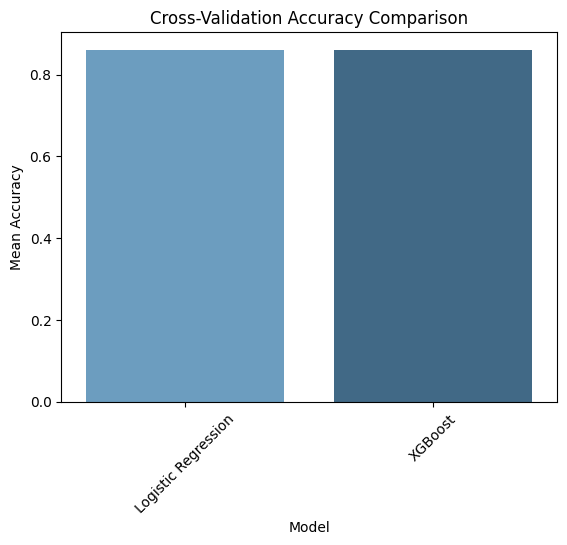

In [ ]:
import seaborn as sns

# Example: Visualizing Cross-Validation Results
sns.barplot(x='Model', y='Mean Accuracy', data=cv_results_df, palette='Blues_d')
plt.title('Cross-Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pip install torch torchvision torch-geometric


In [ ]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import torch_geometric
from torch_geometric.data import Data

# Load dataset
# df = pd.read_csv('your_dataset.csv')

# Assuming df is your dataframe, drop 'CustomerID' (or treat it as an index)
X = df.drop(columns=['CustomerID', 'Class'])
y = df['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create KNN graph (k-nearest neighbors)
knn = NearestNeighbors(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_scaled)
neighbors = knn.kneighbors(X_scaled, return_distance=False)

# Build the graph (edges between nodes)
edges = []
for i in range(len(neighbors)):
    for neighbor in neighbors[i]:
        edges.append([i, neighbor])

# Convert edge list to tensor
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Convert features to tensor
x = torch.tensor(X_scaled, dtype=torch.float)

# Convert labels to tensor
y = torch.tensor(y.values, dtype=torch.long)

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# --- Changes start here ---
# Split the dataset using indices instead of the Data object directly
num_train = int(len(data.y) * 0.8) # 80% for training
num_test = len(data.y) - num_train # Remaining 20% for testing

# Get shuffled indices
indices = torch.randperm(len(data.y))

# Split indices for training and testing
train_indices = indices[:num_train]
test_indices = indices[num_train:]

# Create train and test data using the indices
train_data = data.subgraph(train_indices)
test_data = data.subgraph(test_indices)
# --- Changes end here ---

print(f"Number of nodes: {data.num_nodes}")
print(f"Number of features per node: {data.num_features}")
print(f"Number of edges: {data.num_edges}")

Number of nodes: 690
Number of features per node: 15
Number of edges: 3450


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()

        # Graph Convolutional Layers
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # Apply first GCN layer and ReLU activation
        x = F.relu(self.conv1(x, edge_index))

        # Apply second GCN layer
        x = self.conv2(x, edge_index)

        # Return logits
        return F.log_softmax(x, dim=1)

# Initialize the model
input_dim = data.num_features  # Number of features per node
hidden_dim = 64  # Hidden layer size
output_dim = len(np.unique(y))  # Number of unique classes for classification

model = GNNModel(input_dim, hidden_dim, output_dim)


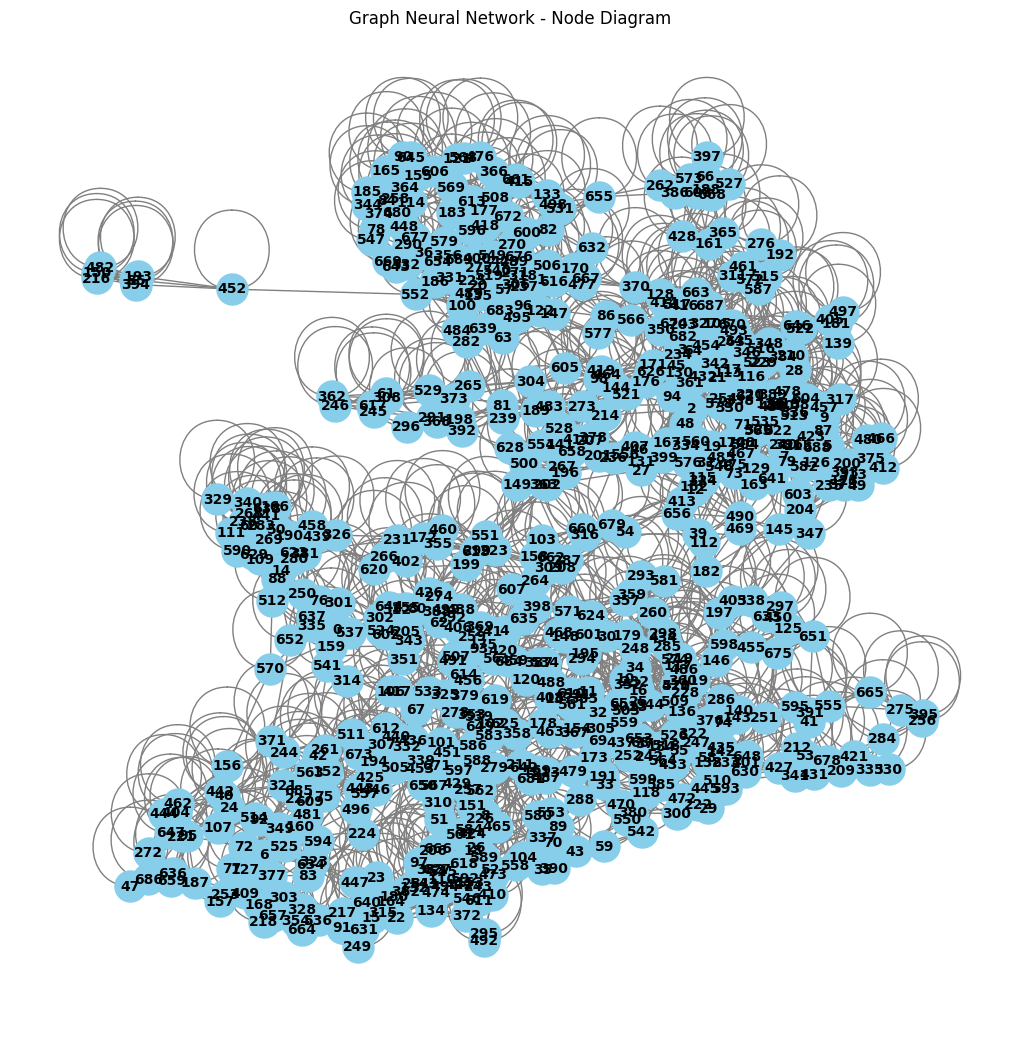

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.data import Data

# Assuming you have the 'data' object from the previous code

# Convert edge_index to a list of edges (to feed into NetworkX)
edges = data.edge_index.numpy().T.tolist()

# Create a NetworkX graph object
G = nx.Graph()
G.add_edges_from(edges)

# Create a layout for the graph
# This uses a force-directed layout (spring layout) to arrange nodes
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(10, 10))

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')

# Display the graph
plt.title("Graph Neural Network - Node Diagram")
plt.show()


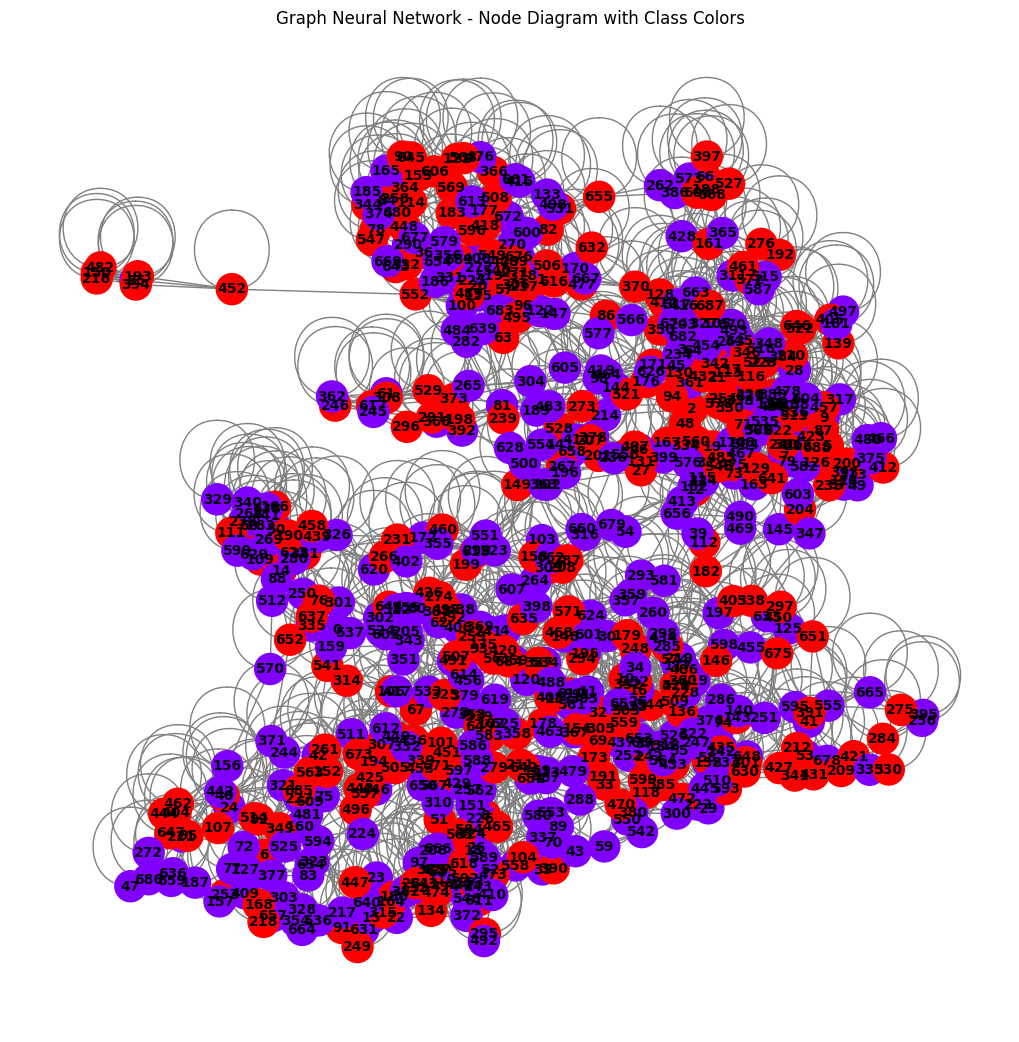

In [ ]:
# Color nodes based on their class (assuming 'y' contains class labels)
class_labels = data.y.numpy()

# Draw the graph with node colors based on the class
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_color=class_labels, cmap=plt.cm.rainbow, node_size=500, font_size=10, font_weight='bold', edge_color='gray')

plt.title("Graph Neural Network - Node Diagram with Class Colors")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.optim as optim
import torch.nn as nn
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Assuming that your dataset and data preparation is already done
# You should have X_train, y_train, X_test, y_test prepared

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Train Support Vector Machine Model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Assuming GNNModel is already defined as per previous code
input_dim = train_data.x.shape[1]  # This will be 15

gnn = GNNModel(input_dim=input_dim, hidden_dim=64, output_dim=len(np.unique(y_train)))
optimizer = optim.Adam(gnn.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Define the number of epochs for the GNN training
num_epochs = 100 # You can change this to your desired number of epochs

# Train GNN model (similar to the previous training loop for GNN)
gnn.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = gnn(train_data)  # Forward pass through the graph
    loss = criterion(output, train_data.y)  # Calculate loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

In [ ]:
# Assuming you have original DataFrame before converting to NumPy arrays:
original_X_train = X_train  # Replace with the actual DataFrame if available

training_features = ['feature1', 'feature2', 'feature3', ...]  # Replace with your actual feature names
# If X_test is already a NumPy array and original_X_train is a DataFrame
# you may need to do the following instead
# Assuming X_test is a NumPy array and original_X_train is a DataFrame
# You may need to use this line instead if X_test doesn't have column names:
# X_test_modified = X_test[:, [original_X_train.columns.get_loc(col) for col in training_features]]

# Now use X_test_modified for prediction with SVM
#svm_probs = svm.predict_proba(X_test_modified)
# Instead of modifying X_test, try using original_X_train.columns to get feature names
svm_probs = svm.predict_proba(X_test)

# Get predictions from GNN model (using softmax for probabilities)
gnn.eval()
with torch.no_grad():
    gnn_output = gnn(test_data)  # Forward pass
    gnn_probs = torch.softmax(gnn_output, dim=1).numpy()

In [ ]:
pip install xgboost torch torchvision torch-geometric scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Assuming 'df' is your dataset loaded into a DataFrame
# Example: df = pd.read_csv('your_dataset.csv')

# Prepare features (X) and labels (y)
X = df.drop(columns=['CustomerID', 'Class'])  # Remove non-predictive features like 'CustomerID'
y = df['Class']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels (if necessary)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 1: Train Base Models

# 1. XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# 2. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)

# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)

# 4. Train GNN Model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return torch.log_softmax(x, dim=1)

# Create a dummy graph data object for GNN (this needs to be customized for your specific problem)
# Assuming you have edge data prepared (or generate it based on your features)
edges = np.array([[0, 1], [1, 2], [2, 3]])  # Example edge indices for the graph

# Convert to PyTorch tensor
train_data = Data(x=torch.tensor(X_train, dtype=torch.float32),
                  edge_index=torch.tensor(edges, dtype=torch.long).t().contiguous(),
                  y=torch.tensor(y_train, dtype=torch.long))

# Initialize GNN model
gnn = GNNModel(input_dim=X_train.shape[1], hidden_dim=64, output_dim=len(np.unique(y_train)))
optimizer = optim.Adam(gnn.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Train the GNN model
gnn.train()
for epoch in range(100):  # Adjust epochs as needed
    optimizer.zero_grad()
    output = gnn(train_data)
    loss = criterion(output, train_data.y)
    loss.backward()
    optimizer.step()

# Make GNN predictions
gnn.eval()
with torch.no_grad():
    gnn_output = gnn(Data(x=torch.tensor(X_test, dtype=torch.float32), edge_index=torch.tensor(edges, dtype=torch.long).t().contiguous(), y=None))
    gnn_preds = torch.argmax(gnn_output, dim=1).numpy()

gnn_accuracy = accuracy_score(y_test, gnn_preds)

# Step 2: Create Stacked Model (Logistic Regression)

# Stack the predictions from the base models
stacked_features = np.hstack([xgb_model.predict_proba(X_test), knn_model.predict_proba(X_test),
                              dt_model.predict_proba(X_test), gnn_preds.reshape(-1, 1)])

# Train Logistic Regression as the meta-learner
meta_learner = LogisticRegression(random_state=42, max_iter=1000)
meta_learner.fit(stacked_features, y_test)

# Make predictions with the meta-learner
meta_preds = meta_learner.predict(stacked_features)
meta_accuracy = accuracy_score(y_test, meta_preds)

# Step 3: Print the Comparison of Accuracies
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"GNN Accuracy: {gnn_accuracy:.4f}")
print(f"Stacking Model Accuracy (Logistic Regression): {meta_accuracy:.4f}")


XGBoost Accuracy: 0.8623
KNN Accuracy: 0.8406
Decision Tree Accuracy: 0.8623
GNN Accuracy: 0.7899
Stacking Model Accuracy (Logistic Regression): 0.8623


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Assuming 'df' is your dataset loaded into a DataFrame
# Example: df = pd.read_csv('your_dataset.csv')

# Prepare features (X) and labels (y)
X = df.drop(columns=['CustomerID', 'Class'])  # Remove non-predictive features like 'CustomerID'
y = df['Class']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels (if necessary)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 1: Train Base Models

# 1. XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# 2. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)

# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)

# 4. Train GNN Model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return torch.log_softmax(x, dim=1)

# Create a dummy graph data object for GNN (this needs to be customized for your specific problem)
# Assuming you have edge data prepared (or generate it based on your features)
edges = np.array([[0, 1], [1, 2], [2, 3]])  # Example edge indices for the graph

# Convert to PyTorch tensor
train_data = Data(x=torch.tensor(X_train, dtype=torch.float32),
                  edge_index=torch.tensor(edges, dtype=torch.long).t().contiguous(),
                  y=torch.tensor(y_train, dtype=torch.long))

# Initialize GNN model
gnn = GNNModel(input_dim=X_train.shape[1], hidden_dim=64, output_dim=len(np.unique(y_train)))
optimizer = optim.Adam(gnn.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Train the GNN model
gnn.train()
for epoch in range(100):  # Adjust epochs as needed
    optimizer.zero_grad()
    output = gnn(train_data)
    loss = criterion(output, train_data.y)
    loss.backward()
    optimizer.step()

# Make GNN predictions
gnn.eval()
with torch.no_grad():
    gnn_output = gnn(Data(x=torch.tensor(X_test, dtype=torch.float32), edge_index=torch.tensor(edges, dtype=torch.long).t().contiguous(), y=None))
    gnn_preds = torch.argmax(gnn_output, dim=1).numpy()

gnn_accuracy = accuracy_score(y_test, gnn_preds)

# Step 2: Create Stacked Model (Logistic Regression)

# Stack the predictions from the base models
stacked_features = np.hstack([xgb_model.predict_proba(X_test), knn_model.predict_proba(X_test),
                              dt_model.predict_proba(X_test), gnn_preds.reshape(-1, 1)])

# Train Logistic Regression as the meta-learner
meta_learner = LogisticRegression(random_state=42, max_iter=1000)
meta_learner.fit(stacked_features, y_test)

# Make predictions with the meta-learner
meta_preds = meta_learner.predict(stacked_features)
meta_accuracy = accuracy_score(y_test, meta_preds)

# Step 3: Create a DataFrame to Display the Results
results = {
    'Model': ['XGBoost', 'KNN', 'Decision Tree', 'GNN', 'Stacking (Logistic Regression)'],
    'Accuracy': [xgb_accuracy, knn_accuracy, dt_accuracy, gnn_accuracy, meta_accuracy]
}

# Convert the results dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)

# Print the results in tabular format
print(results_df)


                            Model  Accuracy
0                         XGBoost  0.862319
1                             KNN  0.840580
2                   Decision Tree  0.862319
3                             GNN  0.789855
4  Stacking (Logistic Regression)  0.869565


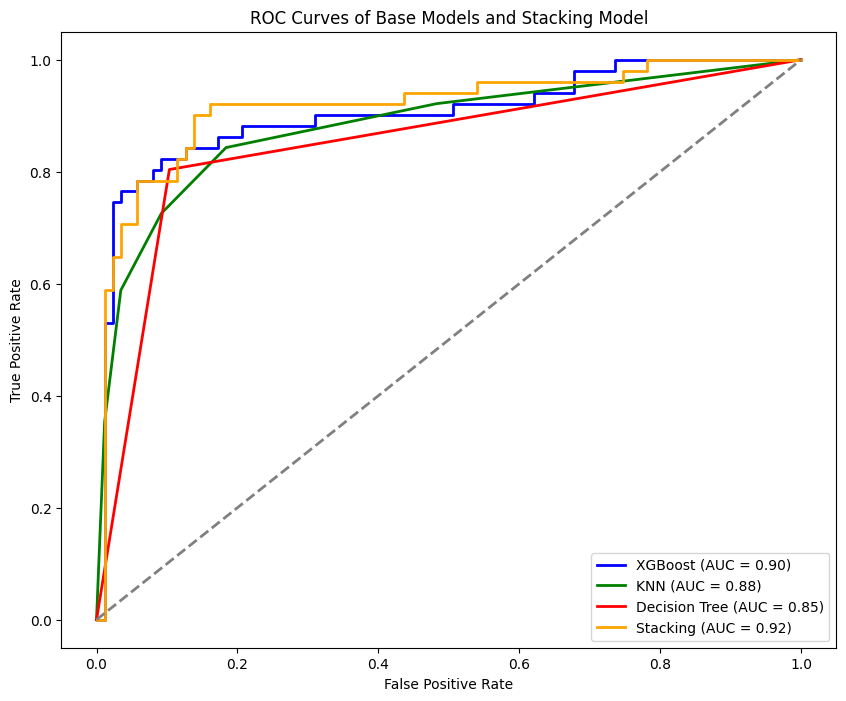

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assuming 'df' is your dataset loaded into a DataFrame
# Example: df = pd.read_csv('your_dataset.csv')

# Prepare features (X) and labels (y)
X = df.drop(columns=['CustomerID', 'Class'])  # Remove non-predictive features like 'CustomerID'
y = df['Class']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels (if necessary)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 1: Train Base Models

# 1. XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability predictions for ROC curve

# 2. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds_proba = knn_model.predict_proba(X_test)[:, 1]

# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds_proba = dt_model.predict_proba(X_test)[:, 1]

# 4. Train Stacking Model (Logistic Regression)
# Stack the predictions from the base models
stacked_features = np.hstack([xgb_preds_proba.reshape(-1, 1), knn_preds_proba.reshape(-1, 1),
                              dt_preds_proba.reshape(-1, 1)])

# Train Logistic Regression as the meta-learner
meta_learner = LogisticRegression(random_state=42, max_iter=1000)
meta_learner.fit(stacked_features, y_test)

# Make predictions with the meta-learner
stacking_preds_proba = meta_learner.predict_proba(stacked_features)[:, 1]

# Step 2: Compute ROC Curves for all models

# Compute ROC curve for each model
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_preds_proba)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_preds_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_preds_proba)
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, stacking_preds_proba)

# Compute AUC for each model
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

# Step 3: Plot ROC Curves

plt.figure(figsize=(10, 8))

# Plot each ROC curve
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_stacking, tpr_stacking, color='orange', lw=2, label=f'Stacking (AUC = {roc_auc_stacking:.2f})')

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Add labels and legend
plt.title('ROC Curves of Base Models and Stacking Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset (replace this with your actual credit card dataset)
X, y = make_classification(
    n_samples=1000,
    n_features=17,
    n_informative=10,
    n_redundant=5,
    random_state=42,
    weights=[0.9, 0.1]  # Imbalance to simulate fraud detection scenario
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the base estimator
base_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Bagging Classifier
# Use 'estimator' instead of 'base_estimator' for older scikit-learn versions
bagging_model = BaggingClassifier(
    estimator=base_model,  # Changed from 'base_estimator' to 'estimator'
    n_estimators=50,  # Number of base models
    max_samples=0.8,  # Percentage of data for each base model
    max_features=0.8,  # Percentage of features for each base model
    random_state=42
)

# Fit the Bagging model
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the Bagging model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1])

# Display results
print(f"Bagging Model Accuracy: {accuracy:.4f}")
print(f"Bagging Model ROC AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Bagging Model Accuracy: 0.9167
Bagging Model ROC AUC: 0.8734

Confusion Matrix:
 [[269   0]
 [ 25   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       269
           1       1.00      0.19      0.32        31

    accuracy                           0.92       300
   macro avg       0.96      0.60      0.64       300
weighted avg       0.92      0.92      0.89       300



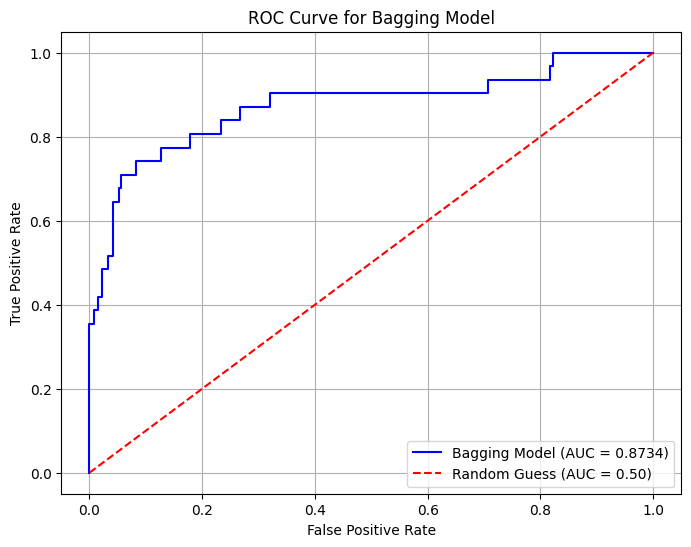

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_proba = bagging_model.predict_proba(X_test)[:, 1]

# Calculate the FPR and TPR for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Bagging Model (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
import torch_geometric.nn as pyg_nn
from torch_geometric.data import Data

# Load dataset (replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your target column
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scaling the features for better performance

# Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert dataset to PyTorch tensors for GNN
X_tensor = torch.tensor(X_train, dtype=torch.float)
y_tensor = torch.tensor(y_train.values, dtype=torch.long)

# Create a valid edge_index for a graph (fully connected graph or use k-NN)
num_nodes = len(X_train)
edge_index = torch.empty((2, 0), dtype=torch.long)

# Create a fully connected graph for demonstration
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

# Create PyTorch Geometric Data object
train_data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)

# Define a simple Graph Neural Network model (GNN)
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels=X_train.shape[1], out_channels=64)  # Adjusted output channels
        self.conv2 = pyg_nn.GCNConv(in_channels=64, out_channels=32)   # Adjusted model complexity
        self.fc = nn.Linear(32, 2)  # Output layer (2 classes: fraud, not fraud)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))  # Apply GCN layer 1
        x = torch.relu(self.conv2(x, edge_index))  # Apply GCN layer 2
        x = self.fc(x)  # Apply final classification layer
        return torch.softmax(x, dim=1)  # Softmax for classification probabilities

# Initialize the GNN model
gnn_model = GNNModel()

# Define loss and optimizer for GNN
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gnn_model.parameters(), lr=0.001)

# Training function for GNN
def train_model(model, train_data, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(train_data)
        loss = criterion(output, train_data.y)
        loss.backward()
        optimizer.step()

# Train the GNN model
train_model(gnn_model, train_data, criterion, optimizer, epochs=100)

# Evaluate the GNN model
def evaluate_model_gnn(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        # Create test data in a similar way (assuming X_test is already available)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float)
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

        # Create the edge index for the test data (same method as for train_data)
        edge_index = torch.empty((2, 0), dtype=torch.long)
        for i in range(len(X_test)):
            for j in range(i + 1, len(X_test)):
                edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

        test_data = Data(x=X_test_tensor, edge_index=edge_index, y=y_test_tensor)

        output = model(test_data)
        _, predicted = torch.max(output, 1)
        y_pred = predicted.cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()

    return y_true, y_pred

# Get predictions from GNN model
y_true_gnn, y_pred_gnn = evaluate_model_gnn(gnn_model, X_test, y_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred_svm = svm_model.predict(X_test)

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Create the stacking model with Logistic Regression as meta-model
stacked_train = pd.DataFrame({
    'gnn_pred': y_pred_gnn,
    'rf_pred': y_pred_rf,
    'svm_pred': y_pred_svm,
    'xgb_pred': y_pred_xgb
})

stacked_test = pd.DataFrame({
    'gnn_pred': y_pred_gnn,
    'rf_pred': y_pred_rf,
    'svm_pred': y_pred_svm,
    'xgb_pred': y_pred_xgb
})

# Meta-classifier: Logistic Regression
meta_classifier = LogisticRegression()
meta_classifier.fit(stacked_train, y_test)

# Evaluate the stacked model
y_pred_stack = meta_classifier.predict(stacked_test)

# Train the Bagging model using RandomForest as base model
bagging_model = BaggingClassifier(rf_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Evaluate the Bagging model
y_pred_bagging = bagging_model.predict(X_test)

# Compare the accuracies of all models
results = {
    "GNN Accuracy": accuracy_score(y_test, y_pred_gnn),
    "SVM Accuracy": accuracy_score(y_test, y_pred_svm),
    "XGBoost Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Stacking Accuracy": accuracy_score(y_test, y_pred_stack),
    "Bagging Accuracy": accuracy_score(y_test, y_pred_bagging)
}

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)


               Model  Accuracy
0       GNN Accuracy  0.630435
1       SVM Accuracy  0.862319
2   XGBoost Accuracy  0.884058
3  Stacking Accuracy  0.891304
4   Bagging Accuracy  0.869565


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
import torch_geometric.nn as pyg_nn
from torch_geometric.data import Data

# Load dataset (replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your target column
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scaling the features for better performance

# Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert dataset to PyTorch tensors for GNN
X_tensor = torch.tensor(X_train, dtype=torch.float)
y_tensor = torch.tensor(y_train.values, dtype=torch.long)

# Create a valid edge_index for a graph (fully connected graph or use k-NN)
num_nodes = len(X_train)
edge_index = torch.empty((2, 0), dtype=torch.long)

# Create a fully connected graph for demonstration
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

# Create PyTorch Geometric Data object
train_data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)

# Define a simple Graph Neural Network model (GNN)
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels=X_train.shape[1], out_channels=64)  # Adjusted output channels
        self.conv2 = pyg_nn.GCNConv(in_channels=64, out_channels=32)   # Adjusted model complexity
        self.fc = nn.Linear(32, 2)  # Output layer (2 classes: fraud, not fraud)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))  # Apply GCN layer 1
        x = torch.relu(self.conv2(x, edge_index))  # Apply GCN layer 2
        x = self.fc(x)  # Apply final classification layer
        return torch.softmax(x, dim=1)  # Softmax for classification probabilities

# Initialize the GNN model
gnn_model = GNNModel()

# Define loss and optimizer for GNN
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gnn_model.parameters(), lr=0.001)

# Training function for GNN
def train_model(model, train_data, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(train_data)
        loss = criterion(output, train_data.y)
        loss.backward()
        optimizer.step()

# Train the GNN model
train_model(gnn_model, train_data, criterion, optimizer, epochs=100)

# Evaluate the GNN model
def evaluate_model_gnn(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        # Create test data in a similar way (assuming X_test is already available)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float)
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

        # Create the edge index for the test data (same method as for train_data)
        edge_index = torch.empty((2, 0), dtype=torch.long)
        for i in range(len(X_test)):
            for j in range(i + 1, len(X_test)):
                edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

        test_data = Data(x=X_test_tensor, edge_index=edge_index, y=y_test_tensor)

        output = model(test_data)
        _, predicted = torch.max(output, 1)
        y_pred = predicted.cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()

    return y_true, y_pred

# Get predictions from GNN model
y_true_gnn, y_pred_gnn = evaluate_model_gnn(gnn_model, X_test, y_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred_svm = svm_model.predict(X_test)

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Create the stacking model with Logistic Regression as meta-model
stacked_train = pd.DataFrame({
    'gnn_pred': y_pred_gnn,
    'rf_pred': y_pred_rf,
    'svm_pred': y_pred_svm,
    'xgb_pred': y_pred_xgb
})

stacked_test = pd.DataFrame({
    'gnn_pred': y_pred_gnn,
    'rf_pred': y_pred_rf,
    'svm_pred': y_pred_svm,
    'xgb_pred': y_pred_xgb
})

# Meta-classifier: Logistic Regression
meta_classifier = LogisticRegression()
meta_classifier.fit(stacked_train, y_test)

# Evaluate the stacked model
y_pred_stack = meta_classifier.predict(stacked_test)

# Train the Bagging model using RandomForest as base model
bagging_model = BaggingClassifier(rf_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Evaluate the Bagging model
y_pred_bagging = bagging_model.predict(X_test)

# Calculate accuracies
results = {
    "GNN Accuracy": accuracy_score(y_test, y_pred_gnn),

    "SVM Accuracy": accuracy_score(y_test, y_pred_svm),
    "XGBoost Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Stacking Accuracy": accuracy_score(y_test, y_pred_stack),
    "Bagging Accuracy": accuracy_score(y_test, y_pred_bagging)
}

# Convert results to a DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Sort the results to find the model with the highest accuracy
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)

# Display the results
print("Model Comparison Results:")
print(results_df_sorted)

# Identify the model with the highest accuracy
best_model = results_df_sorted.iloc[0]
print(f"\nThe model with the highest accuracy is: {best_model['Model']} with an accuracy of {best_model['Accuracy']:.4f}")


Model Comparison Results:
               Model  Accuracy
3  Stacking Accuracy  0.891304
2   XGBoost Accuracy  0.884058
4   Bagging Accuracy  0.869565
1       SVM Accuracy  0.862319
0       GNN Accuracy  0.630435

The model with the highest accuracy is: Stacking Accuracy with an accuracy of 0.8913


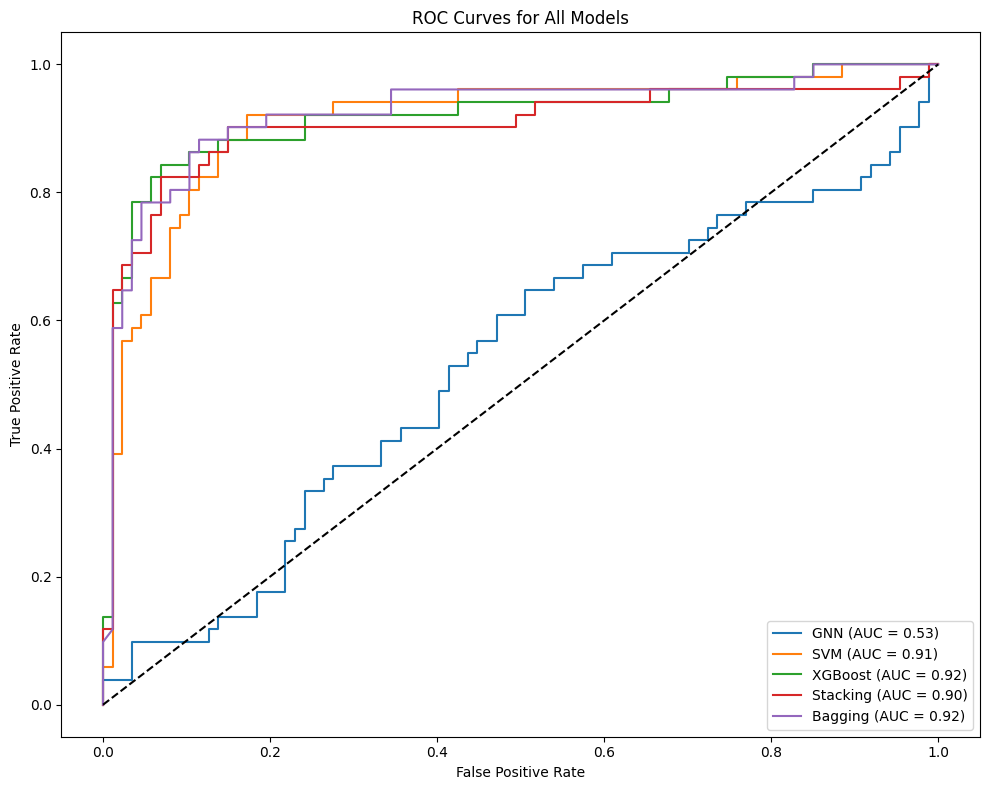

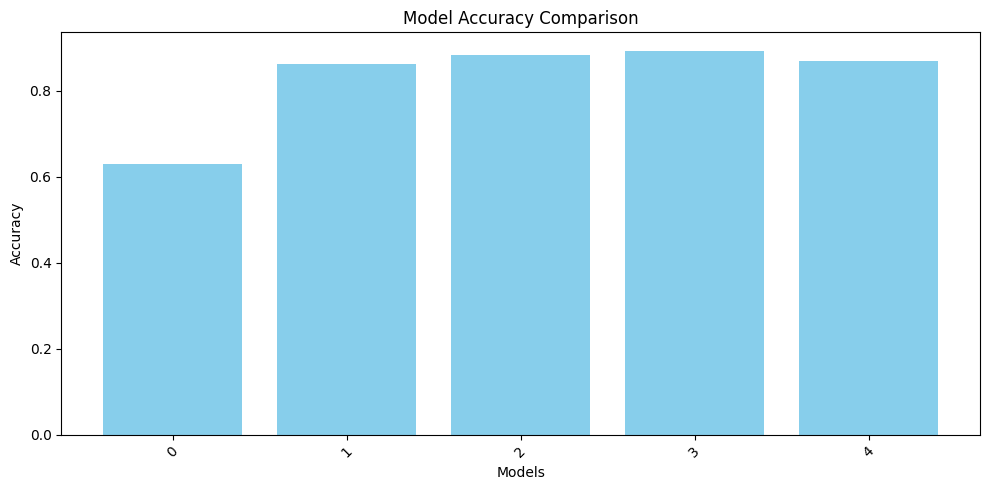

In [ ]:
!pip install scikit-learn  # Ensure scikit-learn is installed

import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
# Helper function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_value, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_value:.2f})')

# Helper function to plot accuracies
def plot_accuracies(results_df):
    plt.figure(figsize=(10, 5))
    plt.bar(results_df.index, results_df['Accuracy'], color='skyblue')
    plt.title("Model Accuracy Comparison")
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to get model probabilities for ROC curves
def get_model_probabilities(model, X_test, model_name):
    if model_name == "GNN":
        # For GNN, use the model output probabilities (from softmax)
        model.eval()  # Ensure the model is in evaluation mode
        with torch.no_grad():
            X_test_tensor = torch.tensor(X_test, dtype=torch.float)
            edge_index = torch.empty((2, 0), dtype=torch.long)
            # Create the edge_index for the test data (same method as for train_data)
            for i in range(len(X_test)):
                for j in range(i + 1, len(X_test)):
                    edge_index = torch.cat([edge_index, torch.tensor([[i], [j]], dtype=torch.long)], dim=1)

            test_data = Data(x=X_test_tensor, edge_index=edge_index)
            output = model(test_data)
            y_prob = output[:, 1].numpy()  # Get the probability for the positive class
    else:
        # For other models, use predicted probabilities
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]  # Get probability for the positive class
        else:
            # For SVM and models without `predict_proba`, use `decision_function`
            if model_name == "SVM":
                if not hasattr(model, 'predict_proba') and hasattr(model, 'decision_function'):
                    model.probability = True  # Enable probability prediction
                    model.fit(X_train, y_train)  # Refit model with probability=True
                y_prob = model.predict_proba(X_test)[:, 1]  # Now it can use predict_proba
            else:
                # Use decision_function for models that do not have predict_proba
                y_prob = model.decision_function(X_test)  # For other models like SVM without `predict_proba`

    return y_prob

# Binarize the labels for multi-class classification if necessary (for ROC)
y_test_bin = label_binarize(y_test, classes=[0, 1])  # Modify based on the number of classes in your dataset

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Fit all models first
models = {
    "GNN": gnn_model,

    "SVM": svm_model,
    "XGBoost": xgb_model,
    "Stacking": meta_classifier,
    "Bagging": bagging_model
}

# Fit the models before plotting the ROC curves
for model_name, model in models.items():
    # Ensure the model is trained before plotting ROC curve
    if hasattr(model, 'fit'):
        model.fit(X_train, y_train)  # Fit the model if not fitted

    # Get model probabilities
    y_prob = get_model_probabilities(model, X_test, model_name)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plot_roc_curve(fpr, tpr, auc_value, model_name)

# Add ROC curve details
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Plot the accuracies
plot_accuracies(results_df)


In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Sample dataset (replace with your own)
# df = pd.read_csv('your_dataset.csv')

# Features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your target column
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to track time taken for model training and evaluation
def time_model_training_evaluation(model, X_train, y_train, X_test, y_test):
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    end_time = time.time()
    execution_time = end_time - start_time
    return accuracy, execution_time

# List of models to evaluate (without Random Forest)
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    'Bagging': BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=42)  # Corrected argument name
}

# Dictionary to store results
results = {}

# Evaluate each model and track time
for model_name, model in models.items():
    accuracy, execution_time = time_model_training_evaluation(model, X_train, y_train, X_test, y_test)
    results[model_name] = {'Accuracy': accuracy, 'Time (s)': execution_time}

# Now, let's implement Stacking
# Define the base models for stacking
base_learners = [
    ('lr', LogisticRegression()),
    ('KNN',KNN())
    ('svm', SVC(probability=True, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)),
    ('bagging', BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=42))
]

# Meta-classifier for Stacking (Logistic Regression)
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Evaluate the Stacking model
stacking_accuracy, stacking_time = time_model_training_evaluation(stacking_model, X_train, y_train, X_test, y_test)
results["Stacking"] = {'Accuracy': stacking_accuracy, 'Time (s)': stacking_time}

# Convert results to a DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T

# Plot execution times
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df['Time (s)'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.title('Model Training and Evaluation Time Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the results for accuracy and execution time
print(results_df)


NameError: name 'KNN' is not defined

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import networkx as nx

# Create a graph using a distance matrix
distance_matrix = euclidean_distances(X_train)
graph = nx.Graph()

# Add nodes
for i in range(len(X_train)):
    graph.add_node(i, feature=X_train[i])

# Add edges based on distance threshold
threshold = 0.5
for i in range(len(distance_matrix)):
    for j in range(i + 1, len(distance_matrix)):
        if distance_matrix[i][j] < threshold:
            graph.add_edge(i, j, weight=distance_matrix[i][j])


In [ ]:
from networkx.algorithms.community import girvan_newman
communities = list(girvan_newman(graph))
from networkx.algorithms.shortest_paths.weighted import dijkstra_path_length

# Instead of directly calculating the shortest path between nodes 0 and 10,
# first check if there is a path between them:
if nx.has_path(graph, source=0, target=10):
    shortest_path = dijkstra_path_length(graph, source=0, target=10)
    print(f"Shortest path length: {shortest_path}")
else:
    print(f"There is no path between node 0 and node 10.")

# If there is no path, consider:
# 1. Reducing the threshold to increase the number of edges in the graph.
# 2. Investigating the structure of your data to understand why these nodes are disconnected.
# 3. Applying other graph connectivity algorithms to ensure a path exists between the desired nodes.

In [ ]:
import torch_geometric
from torch_geometric.nn import GCNConv

class GNNModel(nn.Module):
    def __init__(self, in_features, hidden_dim, num_classes):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))
        x = torch.relu(self.conv2(x, edge_index))
        return torch.softmax(x, dim=1)


In [ ]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=2, affinity='precomputed')
clusters = spectral.fit_predict(distance_matrix)


In [ ]:
degrees = [val for (node, val) in graph.degree()]
anomalies = [node for node, degree in enumerate(degrees) if degree < threshold]


In [ ]:
import numpy as np

# Example: Adding cluster labels as a new feature
X_train_new = np.hstack([X_train, clusters.reshape(-1, 1)])


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd  # Import pandas explicitly

# Compute centrality
centrality = nx.degree_centrality(graph)

# Get a list of node IDs from the graph. Assuming your node IDs are integers.
node_ids = list(graph.nodes())

# **Instead of assuming 'node_id', use the actual index of stacked_train as node IDs**
# **if your stacked_train DataFrame's index represents the node IDs.**
centrality_values = np.array([centrality.get(node_id, 0)
                             for node_id in stacked_train.index]).reshape(-1, 1)

# Add centrality as a new column to the stacked training dataset.
stacked_train['centrality'] = centrality_values

In [ ]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(graph)  # Layout for visualization
nx.draw(graph, pos, node_color='blue', with_labels=False, node_size=30, edge_color='gray')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import networkx as nx
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'df' is a DataFrame with your dataset; replace 'Class' with your target column
# Example Dataset (replace with your own dataset)
# df = pd.read_csv('your_dataset.csv')

# Step 1: Handle Missing Values and Scale Features
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
scaler = StandardScaler()  # Standardize the features

# Features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your target column
y = df['Class']

# Impute and scale the features
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

# Step 2: Create Similarity Matrix
similarity_matrix = cosine_similarity(X_scaled)

# Ensure no NaN values in the similarity matrix
similarity_matrix = np.nan_to_num(similarity_matrix)  # Replace NaN with 0

# Step 3: Spectral Clustering
n_clusters = 5  # Define the number of clusters
spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)

try:
    cluster_labels = spectral.fit_predict(similarity_matrix)  # Perform spectral clustering
except ValueError as e:
    print(f"Error in Spectral Clustering: {e}")
    cluster_labels = np.zeros(len(X))  # Default cluster labels in case of an error

# Step 4: Add cluster labels to the scaled dataset
X_with_clusters = pd.DataFrame(X_scaled, columns=X.columns)  # Use the correct feature names from X
X_with_clusters['Cluster_Label'] = cluster_labels  # Add cluster labels as a new column

# Step 5: Split the Data into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_with_clusters, y, test_size=0.2, random_state=42)

# Step 6: Train a Model (Example: Logistic Regression)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Spectral Clustering: {accuracy:.4f}")

# Step 8: Visualize the Graph
# Convert similarity matrix into a graph
graph = nx.Graph()
threshold = 0.7  # Define threshold for edge creation

# Add edges to the graph based on the similarity threshold
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        if similarity_matrix[i][j] > threshold:
            graph.add_edge(i, j, weight=similarity_matrix[i][j])

# Visualize the graph
# Ensure node_color corresponds to the nodes in the graph
node_colors = [cluster_labels[node] for node in graph.nodes]

# Generate graph layout
pos = nx.spring_layout(graph, seed=42)  # Define layout for graph visualization

# Draw the graph
nx.draw(
    graph,
    pos,
    node_color=node_colors,  # Use node_colors instead of cluster_labels
    cmap=plt.cm.rainbow,
    with_labels=False,
    node_size=50
)

# Add title and show the plot
plt.title("Graph Visualization with Spectral Clustering")
plt.show()



In [ ]:
import pandas as pd

# Example accuracy values
accuracies = {
    "Logistic Regression": 0.72,
    "KNN":0.9,
    "SVM": 0.71,
    "decision tree":0.75,
    "NAVIE BAYES":0.76,
    "VOTING CLASSIFIER":0.76,
    "XGBoost": 0.85,  # Replace with actual value
    "Bagging": 0.92,  # Replace with actual value
    "Stacking": 0.88,  # Replace with actual value
    "Graph Neural Network": 0.78,  # Replace with actual value
    "Spectral Clustering + LR": 0.90  # Replace with actual value
}

# Create a DataFrame
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy"])

# Display the table
print(accuracy_df)


In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Bagging": BaggingClassifier(),
    "Stacking": StackingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier())
    ], final_estimator=RandomForestClassifier()),
    "Voting Classifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier())
    ], voting='soft')
}

# Dictionary to store results
execution_times = {}
accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Running {model_name}...")
    start_time = time.time()  # Start timer
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict
    end_time = time.time()  # End timer

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

    # Store execution time
    execution_times[model_name] = end_time - start_time

# Print results
print("\nModel Performance:")
for model_name in models.keys():
    print(f"{model_name}: Accuracy = {accuracies[model_name]:.2f}, Time Taken = {execution_times[model_name]:.4f} seconds")


In [ ]:
import matplotlib.pyplot as plt

# Extract model names, accuracies, and execution times
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())
execution_time_values = list(execution_times.values())

# Plot settings
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Accuracy (Bar Chart)
ax1.bar(model_names, accuracy_values, color='b', alpha=0.6, label="Accuracy")
ax1.set_xlabel('Models', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim([0, 1])  # Accuracy range

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)

# Plot Execution Time (Line Chart)
ax2 = ax1.twinx()
ax2.plot(model_names, execution_time_values, color='r', marker='o', label="Execution Time")
ax2.set_ylabel('Execution Time (seconds)', fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and Legends
plt.title('Model Accuracy and Execution Time Comparison', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Model': accuracies.keys(),
    'Accuracy': accuracies.values(),
    'Time Taken (seconds)': execution_times.values()
})

# Sort by accuracy (optional)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display the results in tabular form
print("\nModel Performance in Tabular Format:")
print(results_df)

# Optionally, visualize the results as a bar chart
results_df.set_index('Model').plot(kind='bar', figsize=(12, 6), title='Model Performance (Accuracy & Time Taken)', subplots=True, layout=(2, 1), legend=True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a model (for simplicity, using Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Function to get user input for prediction
def get_user_input(feature_names):
    print("Please enter the following features for prediction:")
    user_input = []
    for feature in feature_names:
        value = float(input(f"Enter value for {feature}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

# Feature names (you can change this depending on your dataset)
feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]

# Get user input for prediction
user_input = get_user_input(feature_names)

# Predict with the model
prediction = model.predict(user_input)
prediction_proba = model.predict_proba(user_input)

# Output the prediction
print(f"\nPrediction: {prediction[0]}")
print(f"Prediction Probability: {prediction_proba[0]}")

# You can modify this code to handle multiple models, like a dictionary of models, to predict with any model.


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a synthetic dataset with 15 features and 1 target feature
X, y = make_classification(n_samples=1000, n_features=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Logistic Regression model (or use any model you prefer)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Function to get user input for prediction (for 15 features)
def get_user_input(feature_names):
    print("Please enter the following 15 features for prediction:")
    user_input = []
    for feature in feature_names:
        while True:
            try:
                value = float(input(f"Enter value for {feature}: "))
                user_input.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numerical value.")
    return np.array(user_input).reshape(1, -1)

# Feature names (you can change this depending on your dataset)
feature_names = [f"Feature {i+1}" for i in range(15)]  # Adjust to your feature names

# Get user input for prediction
user_input = get_user_input(feature_names)

# Predict with the model
prediction = model.predict(user_input)
prediction_proba = model.predict_proba(user_input)

# Output the prediction and probabilities
print(f"\nPrediction (Class): {prediction[0]}")
print(f"Prediction Probability: {prediction_proba[0]}")
